# <center>Stock Market Analysis Project: Apple Inc. Trading Volume Forecasting



# Problem statement

In the rapidly evolving landscape of the technology sector, investor sentiment and market dynamics can significantly impact stock trading volumes. Apple Inc., as a leading technology company, has experienced notable fluctuations in its stock trading volume, particularly with a marked increase post-2020. This project aims to unravel the underlying causes of these volume changes and to forecast future movements in response to emerging trends and product developments. The challenge lies in accurately modeling these complex market behaviors and predicting how upcoming innovations, such as 'Apple Vision' and proprietary advancements in AI, may affect investor activity and trading patterns. A comprehensive understanding of these factors is crucial for investors and financial analysts seeking to optimize investment strategies. Utilizing historical stock price data, we will embark on a data-driven journey to extract insights and patterns through exploratory data analysis (EDA). Our endeavor will involve the development and optimization of predictive models, including ARIMA and SARIMA, both with and without the integration of exogenous variables, to forecast critical stock indicators such as opening and closing prices, as well as the volume of stocks traded.

The project is structured to meticulously segment the data into training and testing sets, where the training set serves as the foundation for model building and the test set as the benchmark for performance evaluation. The forecasting precision will be quantitatively assessed using the Root Mean Squared Error (RMSE) metric, which will facilitate a rigorous evaluation of the models' efficacy in predicting market trends. This case study not only aims to harness the predictive power of statistical models for financial forecasting but also seeks to provide a comprehensive analytical framework that can assist firms in making informed decisions in the data-driven landscape of the stock market.

Key Objectives:

- Conduct an exploratory data analysis (EDA) to uncover trends, seasonal patterns, and anomalies within the historical stock data of Apple.
- Develop ARIMA and SARIMA models to capture the intrinsic time series characteristics and assess the impact of external factors on stock performance.
- Evaluate the models' predictive accuracy on the test data using RMSE, ensuring the reliability and robustness of the forecasts.
- Explore the practical implications of the forecasting results for investment strategies and market participation.



# Work 

- Analyzed historical stock data, revealing a substantial increase in trading volume post-2020, coinciding with Apple's strategic market movements and global economic shifts
- Implemented ARIMA and SARIMAX statistical models to identify patterns and seasonality in historical stock trading volumes.
- Investigated market trends and product launches, linking heightened trading activity to key events such as Apple's stock split and the company's pivot to services and wearables.
- Achieved an error rate of less than 2% compared to average trading volumes, demonstrating the model's strong predictive performance in a real-world scenario.
- Interpreted diagnostic plots for model validation and optimized model configurations based on AIC for improved forecast precision.
- Attained robust model evaluation metrics, with an RMSE of 3187.89 and a MAPE of 14.16%, reflecting high predictive accuracy.
- Predicted future volume increases by synthesizing data with anticipated product releases, including "Apple Vision" and new AI advancements, positioning Apple at the forefront of innovation.
- Utilized real-time data from Alpha Vantage API and SARIMAX modeling, incorporating external factors to refine forecasts and provide data-driven insights for investment strategies.

Key Insights:

The 2020 stock split significantly augmented trading volume, enhancing Apple's market liquidity and accessibility to a broader range of investors.
Upcoming product launches, bolstered by Apple's venture into AR/VR and AI technologies, are projected to sustain investor interest and amplify trading volumes through 2024.
In-depth research and analysis underscore the importance of aligning stock volume trends with corporate growth milestones and broader industry trends for accurate forecasting.


### API called to get Data

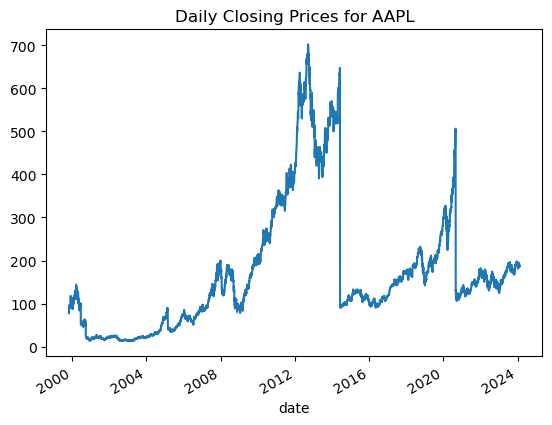

In [1]:
from alpha_vantage.timeseries import TimeSeries
import matplotlib.pyplot as plt

# Your API key here
api_key = 'KA1DZ9DAVS60XC5E'

# Initialize a TimeSeries object with your API key
ts = TimeSeries(key=api_key, output_format='pandas')

# Get AAPL stock data, adjust the output size and interval as needed
data, meta_data = ts.get_daily(symbol='AAPL', outputsize='full')

# Plot the closing prices
data['4. close'].plot()
plt.title('Daily Closing Prices for AAPL')
plt.show()


In [29]:
data.head

<bound method NDFrame.head of             1. open  2. high    3. low  4. close   5. volume
date                                                        
2024-02-12  188.415  188.670  186.7900    187.15  41781934.0
2024-02-09  188.650  189.990  188.0000    188.85  45155216.0
2024-02-08  189.385  189.535  187.3500    188.32  40962046.0
2024-02-07  190.640  191.050  188.6100    189.41  53438955.0
2024-02-06  186.860  189.310  186.7695    189.30  43490759.0
...             ...      ...       ...       ...         ...
1999-11-05   84.620   88.370   84.0000     88.31   3721500.0
1999-11-04   82.060   85.370   80.6200     83.62   3384700.0
1999-11-03   81.620   83.250   81.0000     81.50   2932700.0
1999-11-02   78.000   81.690   77.3100     80.25   3564600.0
1999-11-01   80.000   80.690   77.3700     77.62   2487300.0

[6109 rows x 5 columns]>

In [2]:
print(data.head())


            1. open  2. high    3. low  4. close   5. volume
date                                                        
2024-02-12  188.415  188.670  186.7900    187.15  41781934.0
2024-02-09  188.650  189.990  188.0000    188.85  45155216.0
2024-02-08  189.385  189.535  187.3500    188.32  40962046.0
2024-02-07  190.640  191.050  188.6100    189.41  53438955.0
2024-02-06  186.860  189.310  186.7695    189.30  43490759.0


In [20]:
data.head()

,1. open,2. high,3. low,4. close,5. volume
date,,,,,
2024-02-12,188.415,188.670,186.7900,187.15,41781934.0
2024-02-09,188.650,189.990,188.0000,188.85,45155216.0
2024-02-08,189.385,189.535,187.3500,188.32,40962046.0
2024-02-07,190.640,191.050,188.6100,189.41,53438955.0
2024-02-06,186.860,189.310,186.7695,189.30,43490759.0


In [21]:
df_date = data['5. volume']

In [22]:
df_date.head()

date
2024-02-12    41781934.0
2024-02-09    45155216.0
2024-02-08    40962046.0
2024-02-07    53438955.0
2024-02-06    43490759.0
Name: 5. volume, dtype: float64

In [23]:
import pandas as pd
from pandas.tseries.holiday import USFederalHolidayCalendar
from pandas.tseries.offsets import CustomBusinessDay

# Assuming 'data' is your DataFrame with the stock prices and dates as the index
start_date = data.index.min()  # Gets the earliest date in your data
end_date = data.index.max()    # Gets the latest date in your data

# If you want the end date to be today, you can use:
# end_date = pd.Timestamp('today')

# Define a CustomBusinessDay object considering US Federal Holidays
us_bd = CustomBusinessDay(calendar=USFederalHolidayCalendar())

# Generate the business days range
date_range = pd.date_range(start=start_date, end=end_date, freq=us_bd)

# Now, 'date_range' contains all the US business days between your start and end dates


In [24]:
import pandas as pd


In [25]:
# Now, create a new DataFrame with this date range
df_date["Time_Stamp"] = pd.DataFrame(date_range, columns=['Time_Stamp'])

# Display the head of the new DataFrame to check
df_date.head()

date
2024-02-12 00:00:00    41781934.0
2024-02-09 00:00:00    45155216.0
2024-02-08 00:00:00    40962046.0
2024-02-07 00:00:00    53438955.0
2024-02-06 00:00:00    43490759.0
Name: 5. volume, dtype: object

In [28]:
df_date.shape

(6110,)

In [30]:
import statsmodels.api as sm
sm.stats.durbin_watson(data['5. volume'])

0.1041594846221576

In [ ]:
# Lets start again from darta

In [32]:
data.head()

,1. open,2. high,3. low,4. close,5. volume
date,,,,,
2024-02-12,188.415,188.670,186.7900,187.15,41781934.0
2024-02-09,188.650,189.990,188.0000,188.85,45155216.0
2024-02-08,189.385,189.535,187.3500,188.32,40962046.0
2024-02-07,190.640,191.050,188.6100,189.41,53438955.0
2024-02-06,186.860,189.310,186.7695,189.30,43490759.0


In [33]:
# Assuming 'data' is your DataFrame
data.columns = ['open', 'high', 'low', 'close', 'volume']

# Now, your DataFrame 'data' has the columns renamed
data.head()


,open,high,low,close,volume
date,,,,,
2024-02-12,188.415,188.670,186.7900,187.15,41781934.0
2024-02-09,188.650,189.990,188.0000,188.85,45155216.0
2024-02-08,189.385,189.535,187.3500,188.32,40962046.0
2024-02-07,190.640,191.050,188.6100,189.41,53438955.0
2024-02-06,186.860,189.310,186.7695,189.30,43490759.0


In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6109 entries, 2024-02-12 to 1999-11-01
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   open    6109 non-null   float64
 1   high    6109 non-null   float64
 2   low     6109 non-null   float64
 3   close   6109 non-null   float64
 4   volume  6109 non-null   float64
dtypes: float64(5)
memory usage: 286.4 KB


In [36]:
from pylab import rcParams

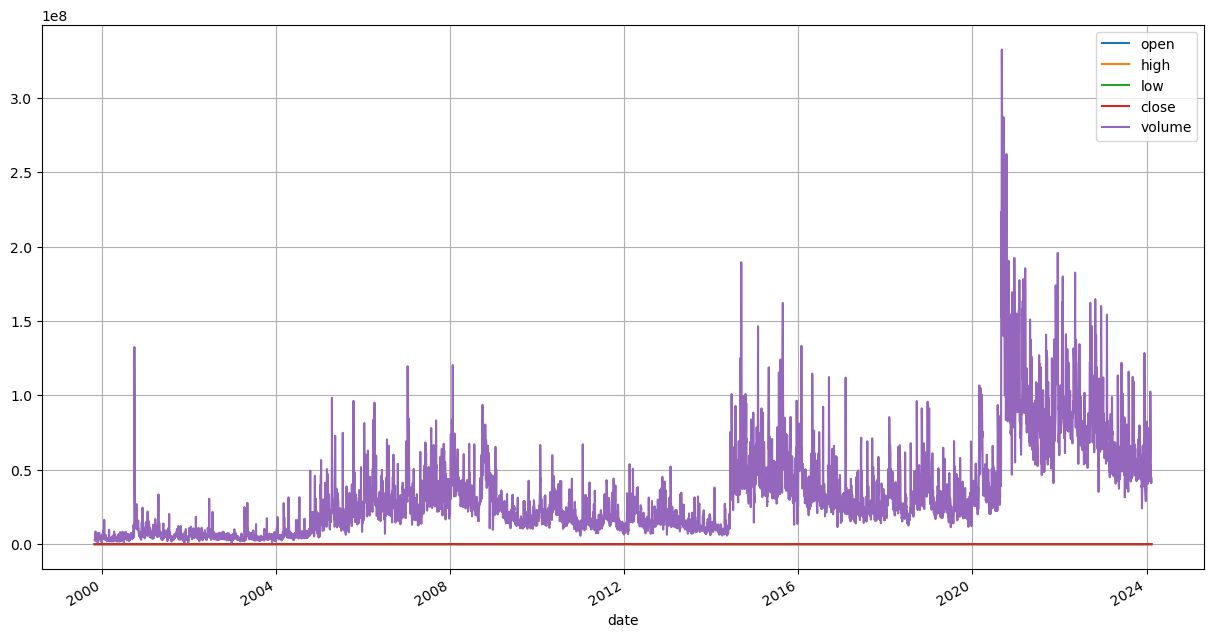

In [37]:
rcParams['figure.figsize']= 15,8
data.plot();
plt.grid()

In [38]:
# First, let's ensure that the index is a datetime type, in case it's not
data.index = pd.to_datetime(data.index)

# Calculate the cutoff date, which is 2 years before the most recent date in your DataFrame
cutoff_date = data.index.max() - pd.DateOffset(years=2)

# Filter the DataFrame to include only the data from the last 2 years
df2 = data[data.index >= cutoff_date]

# Display the first few rows of the filtered DataFrame to verify
df2.head()


,open,high,low,close,volume
date,,,,,
2024-02-12,188.415,188.670,186.7900,187.15,41781934.0
2024-02-09,188.650,189.990,188.0000,188.85,45155216.0
2024-02-08,189.385,189.535,187.3500,188.32,40962046.0
2024-02-07,190.640,191.050,188.6100,189.41,53438955.0
2024-02-06,186.860,189.310,186.7695,189.30,43490759.0


In time series analysis, it is customary to organize data in chronological order, with the earliest data points first and the most recent data points last. This convention helps to better understand how the series evolves over time and is important for various time series forecasting methods, which often assume that the data are organized this way.

In [59]:
df2 = df2.sort_index(ascending=True)


In [60]:
df2.shape

(501, 7)

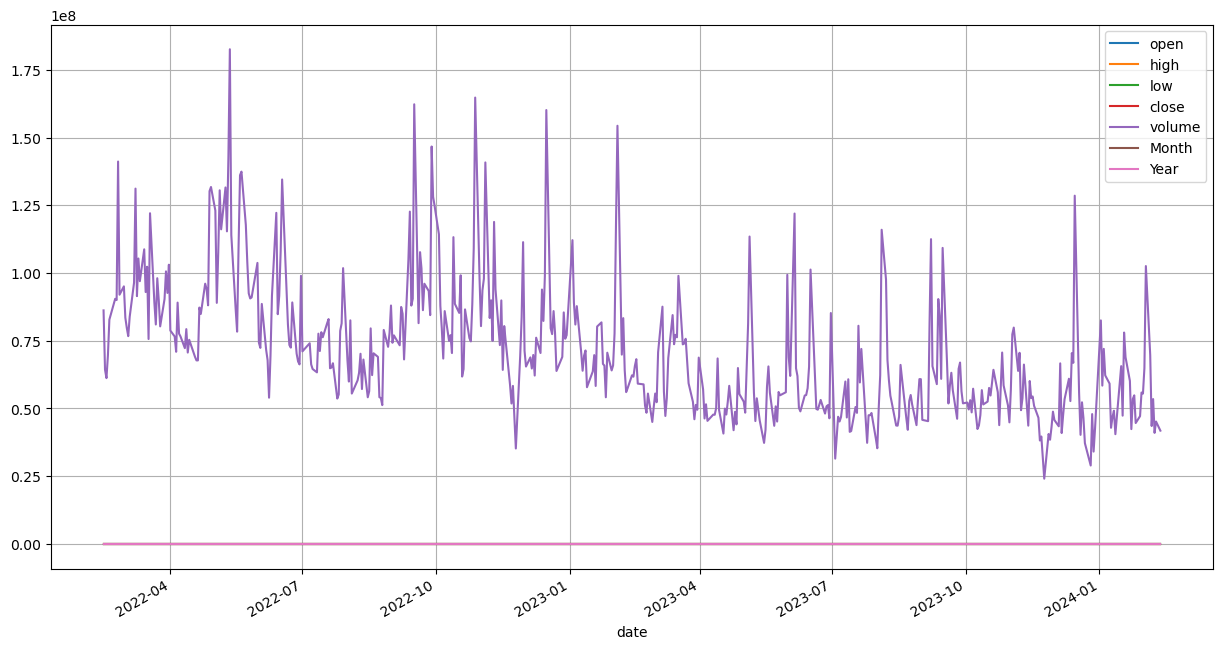

In [61]:
rcParams['figure.figsize']= 15,8
df2.plot();
plt.grid()

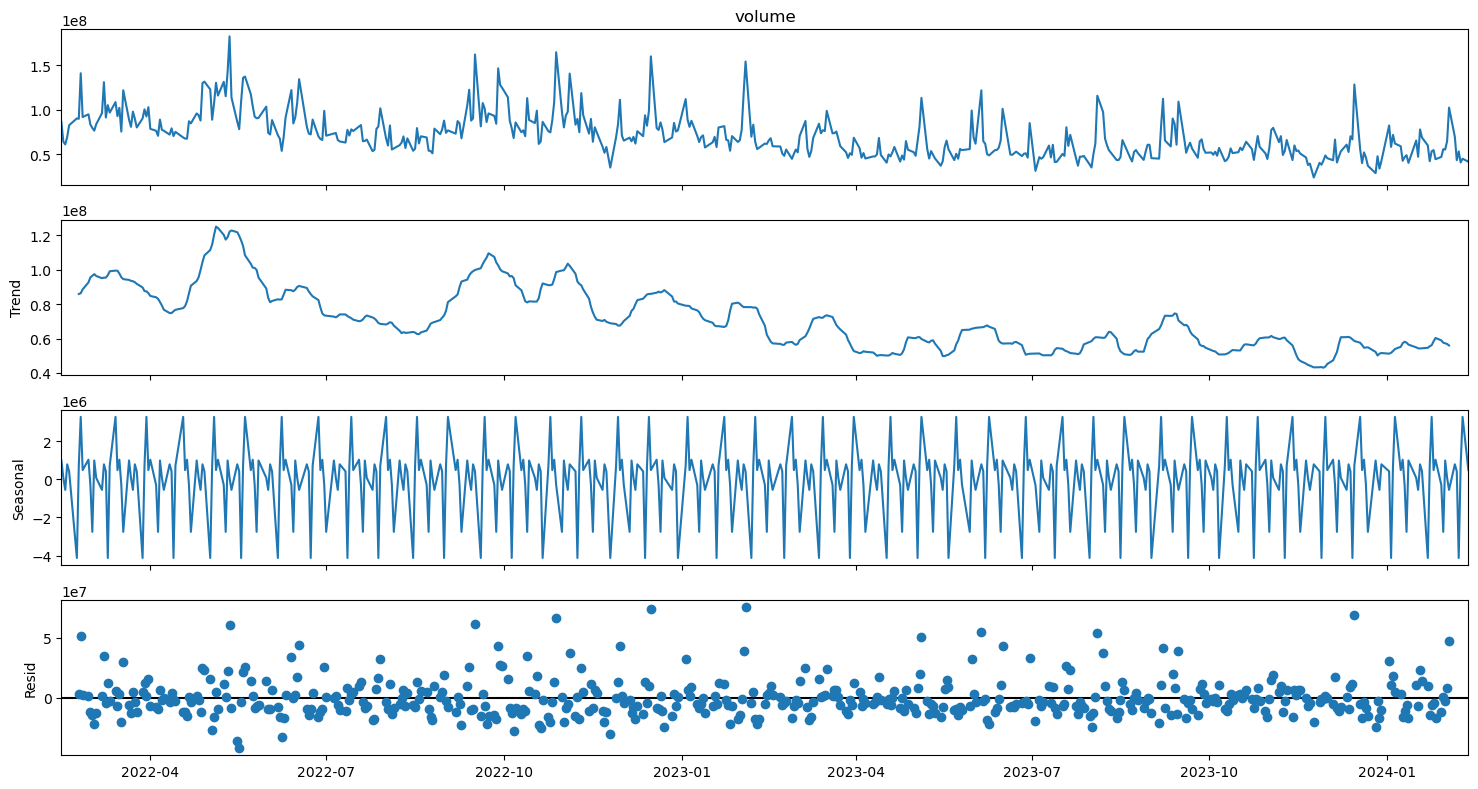

In [62]:
# Decomposition 
from statsmodels.tsa.seasonal import seasonal_decompose
decompostion = seasonal_decompose(df2['volume'], period=12)
decompostion.plot();
plt.show()

In [63]:
import statsmodels.api as sm
sm.stats.durbin_watson(df2['volume'])

0.07181834572854298

    Interpretation of the Durbin-Watson Statistic:
    Value Range: The Durbin-Watson statistic ranges from 0 to 4.
    Around 2.0: A value of approximately 2.0 suggests that there is no autocorrelation in the sample.
    Less than 2.0: A value less than 2.0 indicates positive autocorrelation; the lower the value, the stronger the positive autocorrelation.
    Greater than 2.0: A value greater than 2.0 indicates negative autocorrelation; the closer the value to 4, the stronger the negative autocorrelation.

#### so point is it is not regression problem infact it is clear cut time series problem from the basis of above testm

In [64]:
df2.head()

,open,high,low,close,volume,Month,Year
date,,,,,,,
2022-02-14,167.37,169.5800,166.56,168.88,86185530.0,2,2022
2022-02-15,170.97,172.9500,170.25,172.79,64286320.0,2,2022
2022-02-16,171.85,173.3400,170.05,172.55,61177398.0,2,2022
2022-02-17,171.03,171.9100,168.47,168.88,69589344.0,2,2022
2022-02-18,169.82,170.5413,166.19,167.30,82772674.0,2,2022


# Plot the boxplot of the 'Open' variable with respect to the different years

In [65]:
import seaborn as sns

<Axes: xlabel='date', ylabel='open'>

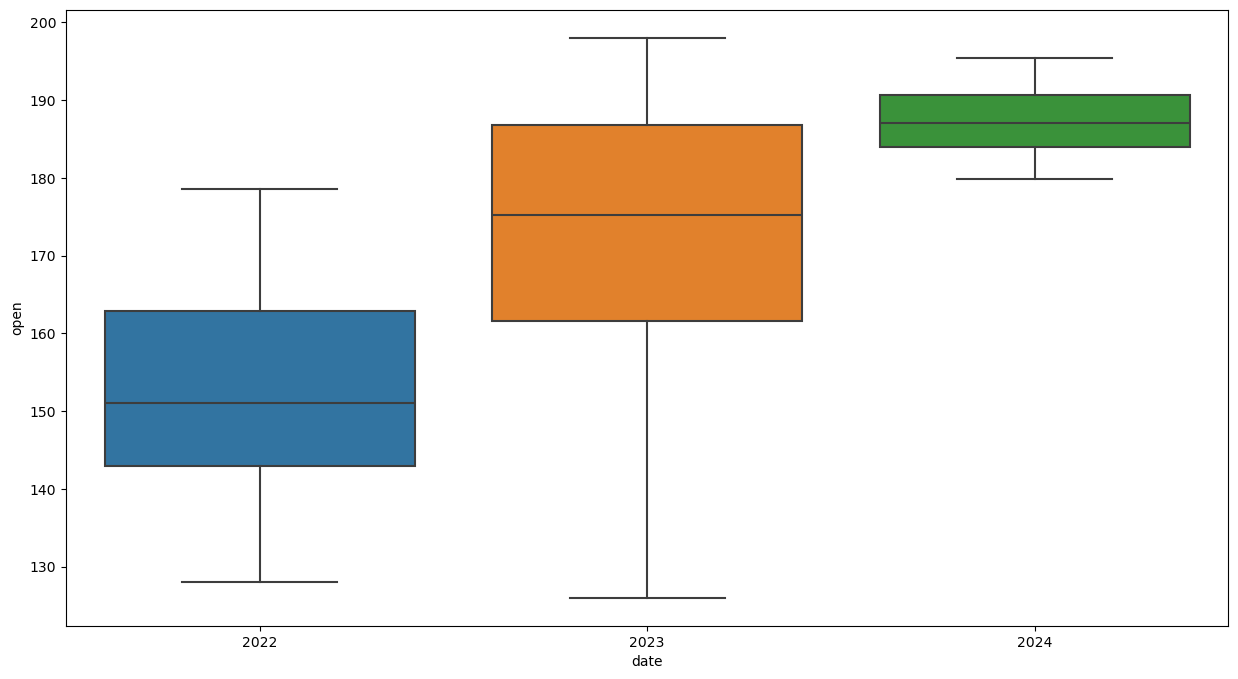

In [66]:
sns.boxplot(x = df2.index.year,y=df2["open"])

# Plot the boxplot of the 'Open' variable with respect to months of different

<Axes: xlabel='date', ylabel='open'>

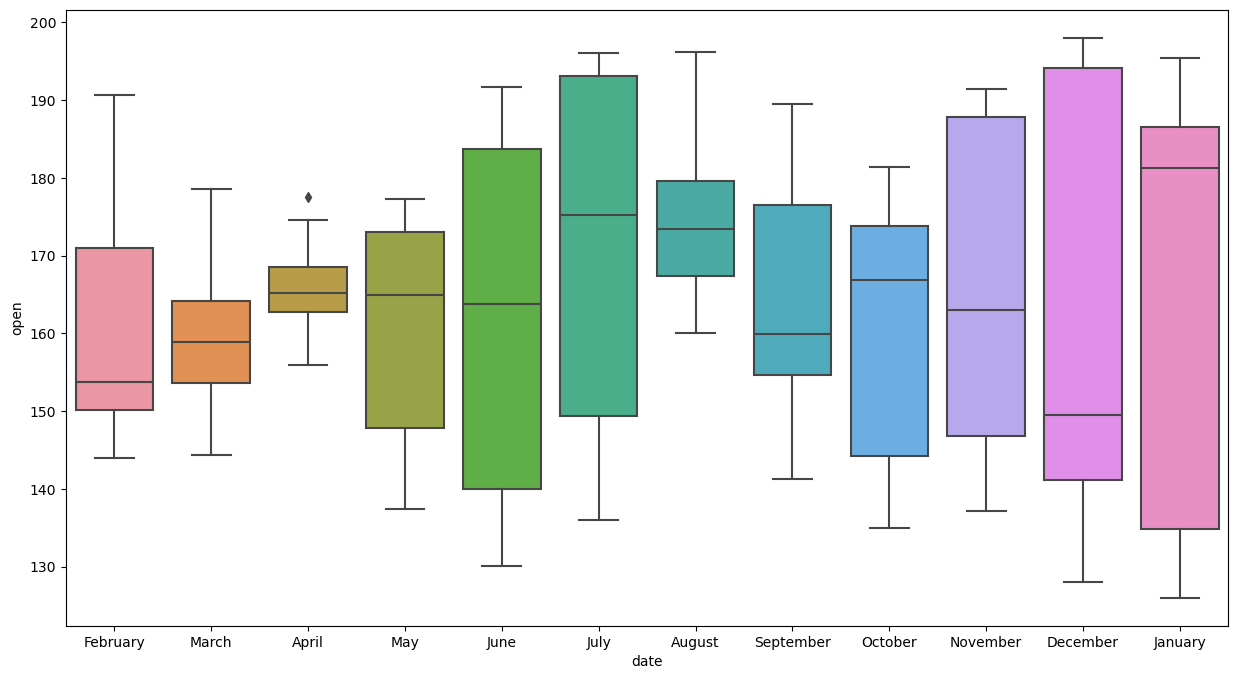

In [67]:
sns.boxplot(x=df2.index.month_name(),y=df2["open"])

In [70]:
# from above we can see feb to to apri increase and then becomes constant in may so I think 4 period is better to understand it

# Additive decomposition

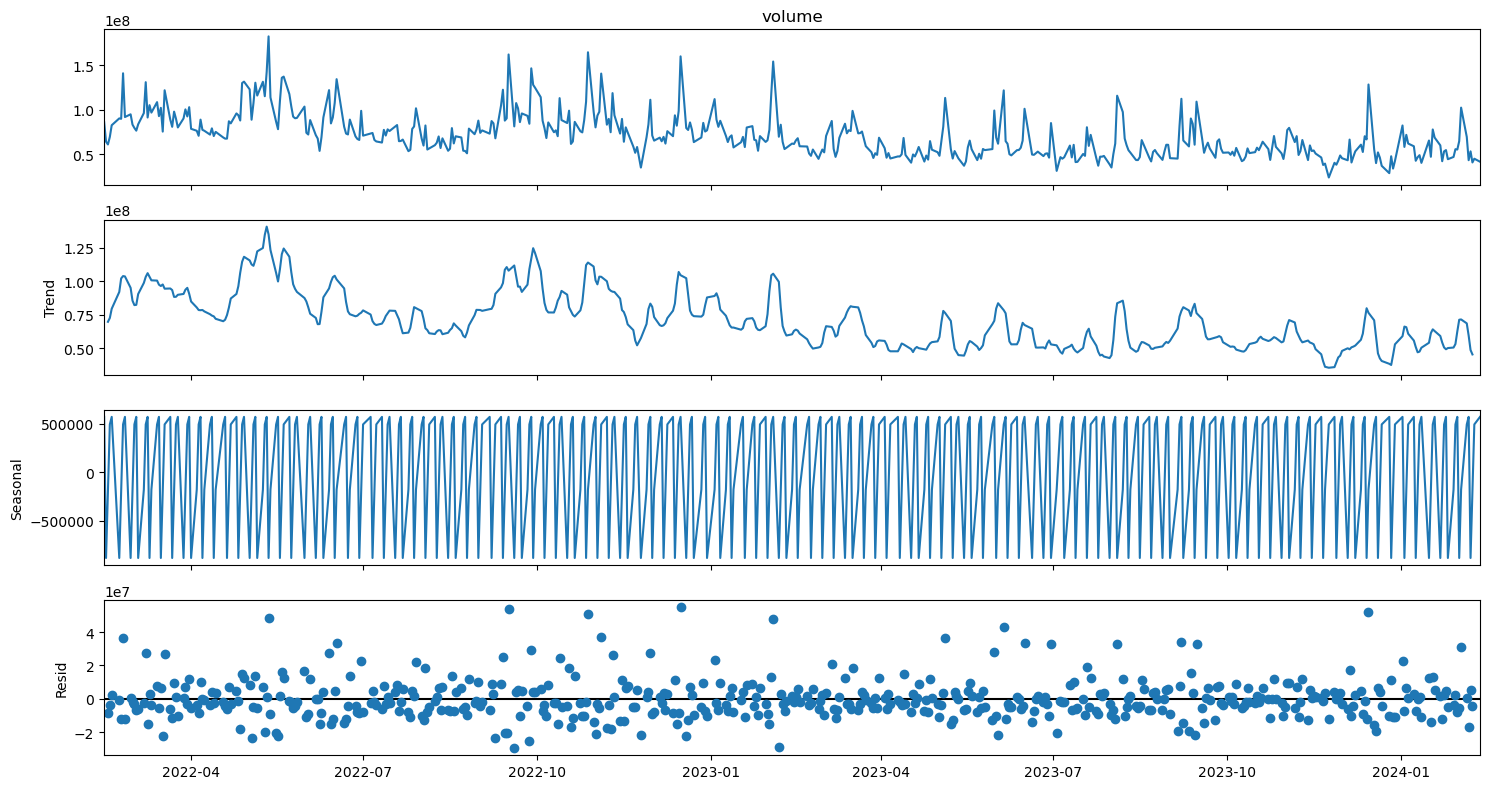

In [68]:
decompostion = seasonal_decompose(df2['volume'], period=4, model = 'additive')
decompostion.plot();
plt.show()

so series is additive. If you suspect that the seasonal variation increases with the level of the time series (which could be suggested by expanding variance in the boxplot), you might consider using model='multiplicative' instead.

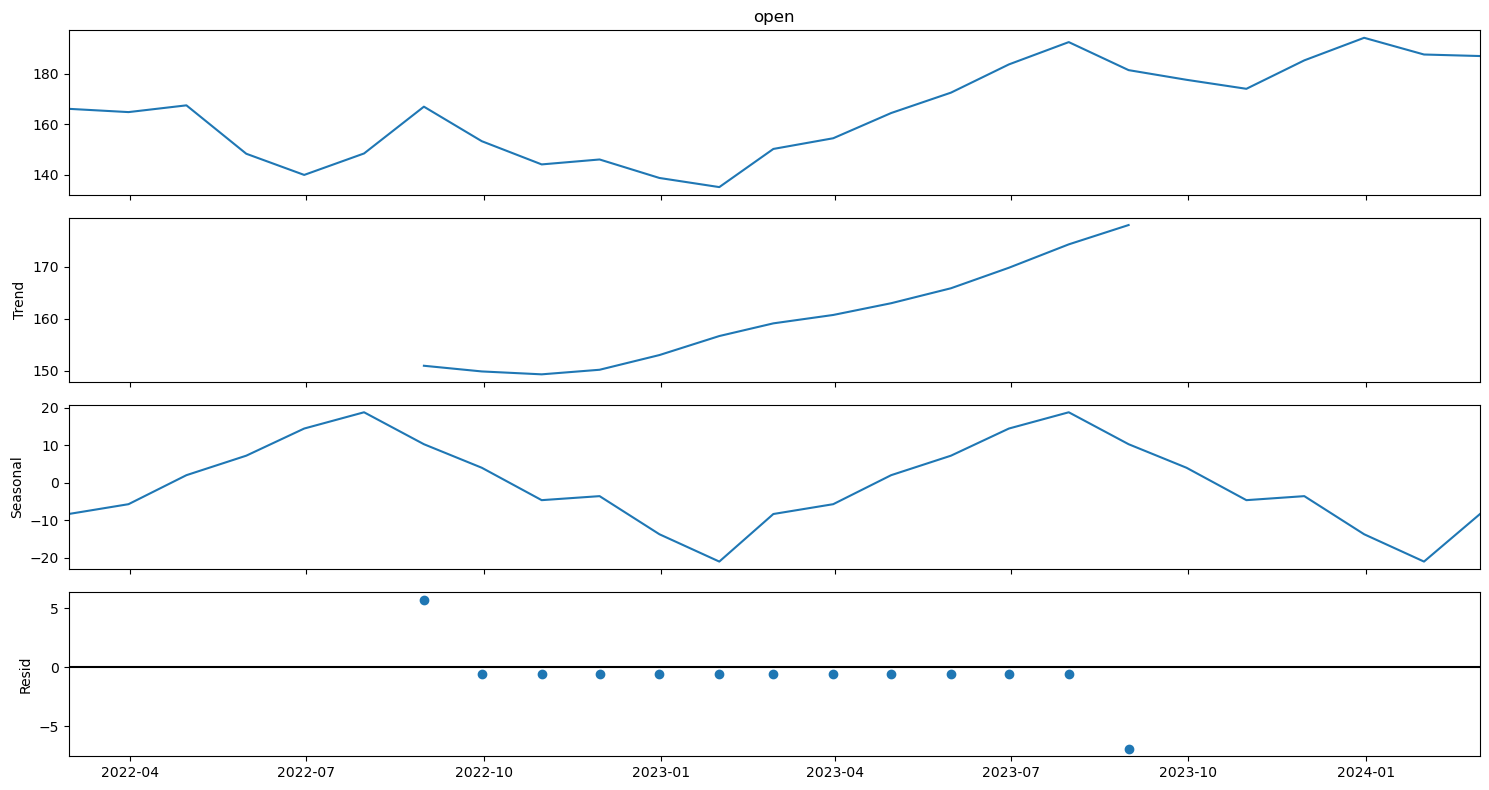

In [69]:
df2_monthly = df2['open'].resample('M').mean()  # Resample to month-end frequency and take mean

# Perform seasonal decomposition with a monthly period (12)
decomposition = seasonal_decompose(df2_monthly, model='additive', period=12)

# Plot the seasonal decomposition
decomposition.plot()

plt.show()


So model is additivte

In [72]:
trend = decompostion.trend
seasonality = decompostion.seasonal
residual = decompostion.resid

print('Trend', '\n', trend.head(12),'\n')
print('seasonality', '\n', seasonality.head(12),'\n')
print('residual', '\n', residual.head(12),'\n')

Trend 
 date
2022-02-14             NaN
2022-02-15             NaN
2022-02-16    6.988304e+07
2022-02-17    7.272785e+07
2022-02-18    7.960324e+07
2022-02-22    9.215200e+07
2022-02-23    1.022470e+08
2022-02-24    1.039720e+08
2022-02-25    1.037301e+08
2022-02-28    9.523536e+07
2022-03-01    8.564553e+07
2022-03-02    8.232893e+07
Name: trend, dtype: float64 

seasonality 
 date
2022-02-14    569826.024938
2022-02-15   -883077.241192
2022-02-16   -178855.755256
2022-02-17    492106.971510
2022-02-18    569826.024938
2022-02-22   -883077.241192
2022-02-23   -178855.755256
2022-02-24    492106.971510
2022-02-25    569826.024938
2022-02-28   -883077.241192
2022-03-01   -178855.755256
2022-03-02    492106.971510
Name: seasonal, dtype: float64 

residual 
 date
2022-02-14             NaN
2022-02-15             NaN
2022-02-16   -8.526787e+06
2022-02-17   -3.630612e+06
2022-02-18    2.599604e+06
2022-02-22   -8.112858e+05
2022-02-23   -1.205887e+07
2022-02-24    3.668340e+07
2022-02-25   

# split the data into training and testing before building a model

In [81]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 501 entries, 2022-02-14 to 2024-02-12
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   open    501 non-null    float64
 1   high    501 non-null    float64
 2   low     501 non-null    float64
 3   close   501 non-null    float64
 4   volume  501 non-null    float64
 5   Month   501 non-null    int32  
 6   Year    501 non-null    int32  
dtypes: float64(5), int32(2)
memory usage: 27.4 KB


In [82]:
df2['Month'] = df2.index.month
df2['Year'] = df2.index.year

In [84]:
df2.head()

,open,high,low,close,volume,Month,Year
date,,,,,,,
2022-02-14,167.37,169.5800,166.56,168.88,86185530.0,2,2022
2022-02-15,170.97,172.9500,170.25,172.79,64286320.0,2,2022
2022-02-16,171.85,173.3400,170.05,172.55,61177398.0,2,2022
2022-02-17,171.03,171.9100,168.47,168.88,69589344.0,2,2022
2022-02-18,169.82,170.5413,166.19,167.30,82772674.0,2,2022


In [85]:
df2.tail()

,open,high,low,close,volume,Month,Year
date,,,,,,,
2024-02-06,186.860,189.310,186.7695,189.30,43490759.0,2,2024
2024-02-07,190.640,191.050,188.6100,189.41,53438955.0,2,2024
2024-02-08,189.385,189.535,187.3500,188.32,40962046.0,2,2024
2024-02-09,188.650,189.990,188.0000,188.85,45155216.0,2,2024
2024-02-12,188.415,188.670,186.7900,187.15,41781934.0,2,2024


In [88]:
#before 2 months of 2024 is taken as traninig data

In [91]:
train = df2[df2.index < pd.to_datetime('2024-01-12')]
train.shape

(480, 7)

In [92]:
test = df2[df2.index >= pd.to_datetime('2024-01-12')]
test.shape

(21, 7)

In [93]:
train_final = train[['volume']]
test_final = test[['volume']]

# Check for stationarity of the Series at alpha=0.05 using appropriate statistical tests

A stationary series is one whose properties do not depend on the time at which the series is observed. In other words, it has constant mean and variance, and covariance is independent of time.

Calculates Rolling Statistics: It calculates the rolling mean and rolling standard deviation of the input timeseries with a window size of 7. This means for each point in time, it calculates the mean and standard deviation of the preceding 7 data points.

Plots Rolling Statistics: It plots the original time series data, along with the rolling mean and rolling standard deviation. This visual inspection can sometimes give an initial indication of whether the series is stationary.

Performs Dickey-Fuller Test: This is a formal statistical test (the Augmented Dickey-Fuller Test) to test the null hypothesis that a unit root is present in a time series sample. A unit root can mean that the time series is non-stationary.

    Test Statistic: A more negative value indicates stronger rejection of the null hypothesis of a unit root (non-stationarity).
    p-value: If the p-value is below a threshold (usually 0.05), you reject the null hypothesis and infer that the series is stationary.
    #Lags used: Number of lags used in the regression when performing the ADF test.
    Number of Observations Used: Number of observations used in the ADF regression.
    Critical Values: The critical value cutoffs for the test statistic at the 1%, 5%, and 10% levels. If the test statistic is less than the critical value, you reject the null hypothesis.



If the test statistic is less than the critical value, you can reject the null hypothesis and conclude that the series is likely stationary. A low p-value (typically <0.05) also leads to the same conclusion. However, if the test statistic is greater than the critical value and the p-value is high, the null hypothesis of non-stationarity cannot be rejected, and the series is likely non-stationary, suggesting that some differencing or transformation might be necessary to make the series stationary before using ARIMA or other time-dependent methods.

In [96]:
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller


In [100]:
# Your provided function
def test_stationarity(timeseries):
    # Determing rolling statistics
    rolmean = timeseries.rolling(window=7).mean()
    rolstd = timeseries.rolling(window=7).std()
    
    # plot rolling statistics:
    plt.figure(figsize=(12, 6))
    orig = plt.plot(timeseries, color='blue', label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    # Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries.dropna(), autolag='AIC')  # dropna() is used as rolling means introduce NA values
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for key, value in dftest[4].items():
        dfoutput['Critical Value (%s)' % key] = value
    print(dfoutput, '\n')

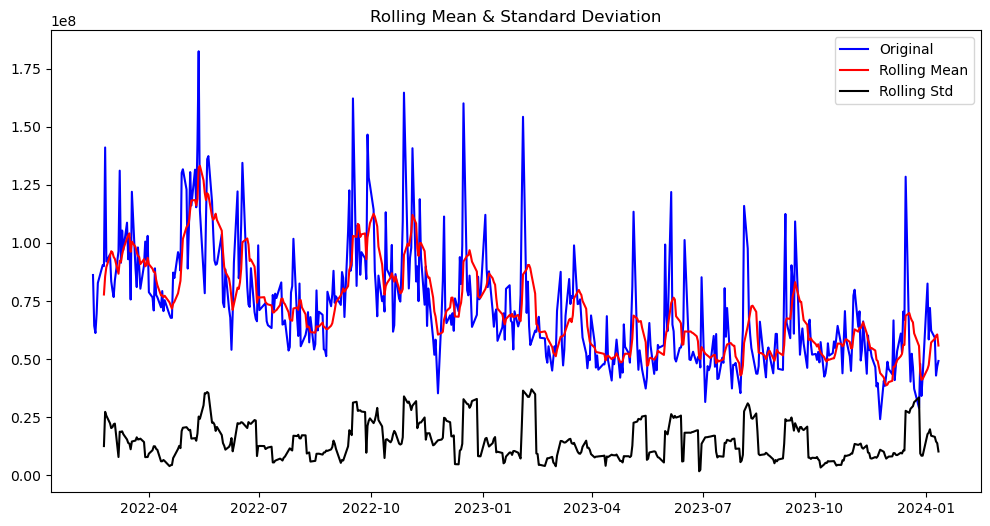

Results of Dickey-Fuller Test:
Test Statistic                  -2.997678
p-value                          0.035112
#Lags Used                       8.000000
Number of Observations Used    471.000000
Critical Value (1%)             -3.444310
Critical Value (5%)             -2.867696
Critical Value (10%)            -2.570049
dtype: float64 



In [101]:

test_stationarity(train_final['volume'])

If Let say p value is  > 0.05 [ p-value is relatively high, the time series is likely non-stationary. In practical terms, this means that the time series may contain trends, seasonality, or other structures that need to be addressed before using statistical methods that assume stationarity. ]

In our case p<0.05 we can reject null and it is stationary 




If it was not stationary then we had to do  Differencing : Differencing is a method used to transform a non-stationary time series into a stationary one. This is done by subtracting the previous observation from the current observation. If the first difference doesn't achieve stationarity, you might need to difference the data a second time, and so on.

# Series is Stationary at 5% aplha as per Dickey Fuller Test

In [103]:
import itertools
p = q = range(0, 3) # max p and q can be 5
d = range(0,1) # because above we already got p<0.05 first time
pdq = list(itertools.product(p, d, q))

model_pdq = [(x[0], x[1], x[2], 4) for x in list(itertools.product(p, d, q))]
print("Examples of parameter combinations for Model....")
print('Model : {}{}'.format(pdq[1], model_pdq[1]))
print('Model : {}{}'.format(pdq[1], model_pdq[2]))
print('Model : {}{}'.format(pdq[2], model_pdq[3]))
print('Model : {}{}'.format(pdq[2], model_pdq[4]))
print('Model : {}{}'.format(pdq[1], model_pdq[5]))

Examples of parameter combinations for Model....
Model : (0, 0, 1)(0, 0, 1, 4)
Model : (0, 0, 1)(0, 0, 2, 4)
Model : (0, 0, 2)(1, 0, 0, 4)
Model : (0, 0, 2)(1, 0, 1, 4)
Model : (0, 0, 1)(1, 0, 2, 4)


The itertools.product function generates all possible combinations of values for p, d, and q. The model_pdq then adds a seasonal component with a period of 4, creating a Seasonal ARIMA, or SARIMA, parameter set. SARIMA models have an additional set of parameters (P, D, Q, m) that specifically describe the seasonal components of the model:



# Build an ARIMA Model
we use arima when only trend their I am just using it for practice

In [108]:
# creating an empty DataFrame with column names only
#procedure for selecting the best ARIMA model for time series forecasting based on the Akaike Information Criterion (AIC).
dfObj = pd.DataFrame(columns=['param', 'AIC'])
dfObj


# remember lesser the aic better is model

,param,AIC


In [109]:
from statsmodels.tsa.arima.model import ARIMA


The Akaike Information Criterion (AIC) is a measure of the relative quality of a statistical model for a given set of data. A model that fits the data very well while using fewer parameters will have a lower AIC.

In [114]:
import warnings
warnings.filterwarnings('ignore')

In [115]:
results = []

for param in pdq:
    mod = ARIMA(train_final['volume'], order=param)
    results_Arima = mod.fit()
    results.append({'param': param, 'AIC': results_Arima.aic})

# Convert the list of dictionaries to a DataFrame
dfObj = pd.DataFrame(results)


In [116]:
dfObj.head()

,param,AIC
0,"(0, 0, 0)",20182.743823
1,"(0, 0, 1)",17540.454686
2,"(0, 0, 2)",17501.122533
3,"(1, 0, 0)",17430.257305
4,"(1, 0, 1)",17399.624515


In [120]:
# from values above we can see ARIMA is not good for this data because we are getting too AIC values
# (1, 0, 1)	17399.624515 is lowest so it can be best here

mod  = ARIMA(train_final["volume"],order = (1,0,1))
result = mod.fit()
print(result.summary())

                               SARIMAX Results                                
Dep. Variable:                 volume   No. Observations:                  480
Model:                 ARIMA(1, 0, 1)   Log Likelihood               -8695.812
Date:                Tue, 13 Feb 2024   AIC                          17399.625
Time:                        00:18:41   BIC                          17416.320
Sample:                             0   HQIC                         17406.187
                                - 480                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        7.18e+07   6.82e-11   1.05e+18      0.000    7.18e+07    7.18e+07
ar.L1          0.9037      0.024     37.104      0.000       0.856       0.951
ma.L1         -0.5033      0.044    -11.568      0.0

#  diagnostic plots for an ARIMA model

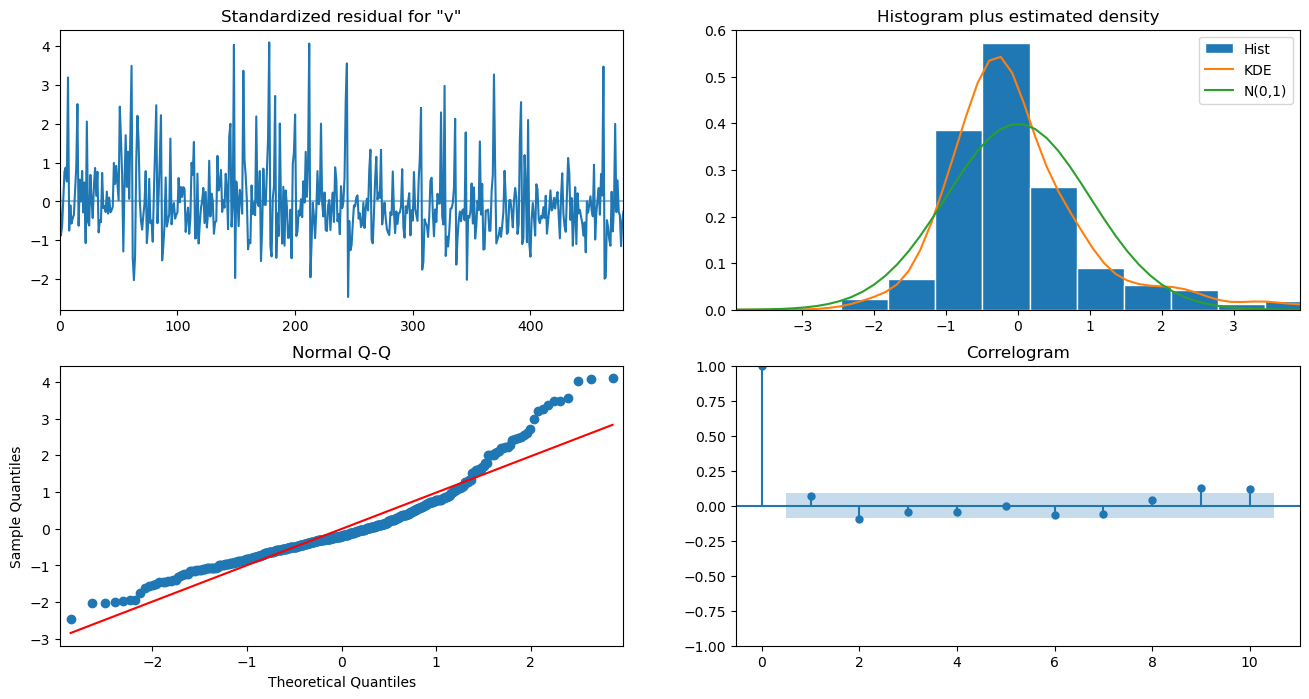

In [121]:
result.plot_diagnostics(figsize=(16,8))
plt.show()

Standardized Residuals: The top-left plot shows the standardized residuals over time. You would expect to see no clear pattern; that is, the residuals should look like white noise. If there are discernible patterns, that could indicate the model has not fully captured the underlying process.

Histogram plus Estimated Density: The top-right plot compares the distribution of the standardized residuals to a normal distribution. The blue bars represent the histogram of the standardized residuals, the orange line is the kernel density estimate (KDE), and the green line is the normal distribution with a mean of 0 and standard deviation of 1. The closer the KDE and histogram are to the green line, the more normal the distribution of residuals.

Normal Q-Q: The bottom-left plot is a Quantile-Quantile plot. It compares the quantiles of the standardized residuals with the quantiles of a normal distribution. If the points fall along the red line, the residuals are normally distributed, which is an assumption of many statistical models.

Correlogram: The bottom-right plot shows the autocorrelation function (ACF) of the residuals. For a good model, you would expect to see that the residuals are not autocorrelated. This means that the blue dots (which represent the autocorrelation at different lags) should fall within the blue 'confidence interval' area, which they mostly do in this case.

# Lets forecast

In [122]:
final_hat_avg = test_final.copy()
pred_ARIMA = result.forecast(steps=len(test_final))
pred_ARIMA

480    5.370060e+07
481    5.544406e+07
482    5.701961e+07
483    5.844342e+07
484    5.973010e+07
485    6.089287e+07
486    6.194365e+07
487    6.289323e+07
488    6.375136e+07
489    6.452685e+07
490    6.522764e+07
491    6.586095e+07
492    6.643326e+07
493    6.695045e+07
494    6.741784e+07
495    6.784021e+07
496    6.822190e+07
497    6.856683e+07
498    6.887854e+07
499    6.916024e+07
500    6.941480e+07
Name: predicted_mean, dtype: float64

# LEts check RMSE of our ARIMA model

In [123]:
from math import sqrt
from sklearn.metrics import mean_squared_error

In [126]:
rmse = sqrt(mean_squared_error(test_final.volume, pred_ARIMA, squared=False))
print(rmse)

4200.569213406313


In [127]:
resultDf = pd.DataFrame({'Test RMSE' : rmse}, index = ['ARIMA(1,0,1)'])
resultDf

,Test RMSE
"ARIMA(1,0,1)",4200.569213


In [128]:
train_final.head()

,volume
date,
2022-02-14,86185530.0
2022-02-15,64286320.0
2022-02-16,61177398.0
2022-02-17,69589344.0
2022-02-18,82772674.0


we can see that the 'volume' of trades for the given dates in February 2022 ranges from about 61 million to 86 million shares traded per day. With an RMSE of approximately 4200, as previously discussed, this would represent a very small percentage of the total volume, suggesting that the ARIMA model's predictions are relatively accurate in terms of the magnitude of volume traded.



In [129]:
average_volume = train_final['volume'].mean()
rmse = 4200.569213406313
rmse_percentage = (rmse / average_volume) * 100

rmse_percentage


0.005850095746492454

RMSE as a percentage of the average trading volume, which is a more intuitive way to understand the model's accuracy relative to the scale of the data

In the realm of stock trading volumes, a less than 1% error rate is generally considered to be very good, as stock volumes can be influenced by a wide range of unpredictable factors and can vary greatly from day to day. Therefore, having a model that can predict the trading volume with an error rate of less than 1% of the average volume means that the model is capturing the underlying patterns in the data quite well.

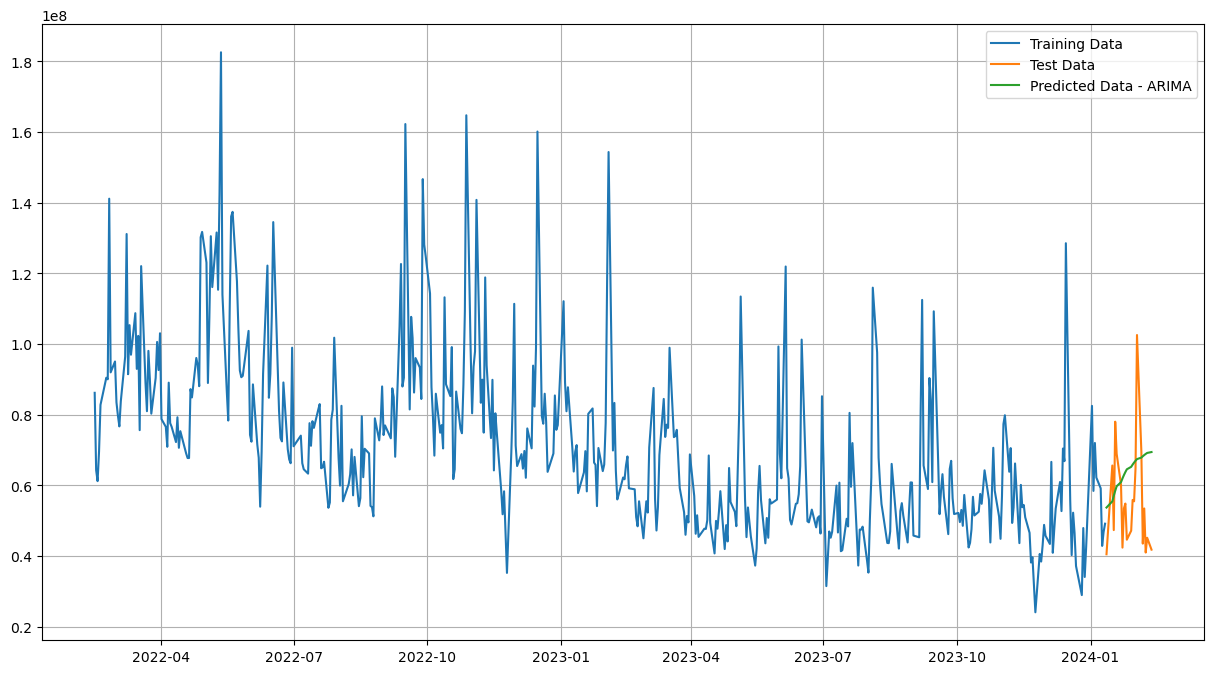

In [130]:
plt.plot(train_final, label='Training Data')
plt.plot(test_final, label='Test Data')
plt.plot(test_final.index, pred_ARIMA, label='Predicted Data - ARIMA')
plt.legend(loc='best')
plt.grid();

from the above graph we can see tha arima is not giving good result so pathetic results (why because there is no trend) and thats why we should go for SARIMA model. 

# Build SARIMA Model

In [136]:
dfObj2 = pd.DataFrame(columns=['param', 'seasonal', 'AIC'])
dfObj2

,param,seasonal,AIC


In [139]:
import statsmodels.api as sm
from statsmodels.tsa.statespace.sarimax import SARIMAX


In [140]:
results_list = []
# Looping through the combinations of parameters
for param in pdq:
    for param_seasonal in model_pdq:
        try:
            mod = SARIMAX(train_final['volume'],
                          order=param,
                          seasonal_order=param_seasonal,
                          enforce_stationarity=False,
                          enforce_invertibility=False)

            results_SARIMA = mod.fit()

            print('SARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results_SARIMA.aic))
            results_list.append({'param': param, 'seasonal': param_seasonal, 'AIC': results_SARIMA.aic})

        except Exception as e:
            print('Failed to fit SARIMA{}x{}12: {}'.format(param, param_seasonal, e))
            continue

# Convert the list of results to a DataFrame
dfObj2 = pd.DataFrame(results_list)

# Show the best results (top 5 by AIC)
dfObj2.sort_values(by='AIC').head()

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.95222D+01    |proj g|=  1.06595D-09

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    1      0      1      0     0     0   1.066D-09   1.952D+01
  F =   19.522227161594824     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(0, 0, 0)x(0, 0, 0, 4)12 - AIC:18743.338075131032
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variabl

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  1.81513D+01    |proj g|=  5.96445D-01

At iterate   10    f=  1.81438D+01    |proj g|=  1.23574D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     11     13      1     0     0   3.724D-05   1.814D+01
  F =   18.143823080892858     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(0, 0, 0)x(1, 0, 1, 4)12 - AIC:17424.070157657145
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.80184D+01    |proj g|=  4.72194D+00

At iterate   

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  1.89158D+01    |proj g|=  3.65600D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      8     12      1     0     0   2.345D-07   1.892D+01
  F =   18.915833057640405     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(0, 0, 1)x(0, 0, 1, 4)12 - AIC:18165.19973533479
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.87747D+01    |proj g|=  1.20448D-01

At iterate    5    f=  1.87344D+01    |proj g|=  1.41051D-04

           * *

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.86925D+01    |proj g|=  1.42126D-01

At iterate    5    f=  1.86883D+01    |proj g|=  9.83814D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5      9     13      1     0     0   1.200D-04   1.869D+01
  F =   18.688339632227652     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(0, 0, 1)x(1, 0, 2, 4)12 - AIC:17950.806046938545
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     11     13      1     0     0   4.484D-06   1.877D+01
  F =   18.768627853202155     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(0, 0, 1)x(2, 0, 1, 4)12 - AIC:18027.88273907407
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.86904D+01    |proj g|=  4.54867D-02

At iterate    5    f=  1.86887D+01    |proj g|=  2.74270D-02

At iterate   10    f=  1.86882D+01    |proj g|=  3.58018D-04

           * *

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  1.88564D+01    |proj g|=  2.53422D-02

At iterate   10    f=  1.88548D+01    |proj g|=  4.26859D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     10     13      1     0     0   4.269D-06   1.885D+01
  F =   18.854840060860926     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(0, 0, 2)x(0, 0, 1, 4)12 - AIC:18108.64645842649
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.87043D+01    |proj g|=  7.91481D-02

At iterate    

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.88073D+01    |proj g|=  3.58083D-02

At iterate    5    f=  1.88053D+01    |proj g|=  2.48126D-02

At iterate   10    f=  1.88051D+01    |proj g|=  5.32481D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     13     15      1     0     0   2.110D-04   1.881D+01
  F =   18.805075613175170     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(0, 0, 2)x(1, 0, 1, 4)12 - AIC:18062.872588648162
RUNNING THE L-

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   10    f=  1.87639D+01    |proj g|=  3.12875D-03

At iterate   15    f=  1.87639D+01    |proj g|=  6.33666D-03

At iterate   20    f=  1.87639D+01    |proj g|=  3.72624D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     22     26      1     0     0   8.173D-06   1.876D+01
  F =   18.763858138876522     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(0, 0, 2)x(2, 0, 1, 4)12 - AIC:18025.30381332146
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    

 This problem is unconstrained.



At iterate   10    f=  1.86437D+01    |proj g|=  9.02156D-04

At iterate   15    f=  1.86437D+01    |proj g|=  2.25841D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     17     20      1     0     0   6.880D-05   1.864D+01
  F =   18.643718905406232     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(0, 0, 2)x(2, 0, 2, 4)12 - AIC:17911.970149189983
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.81969D+01    |proj g|=  7.11971D-05

           * 

 This problem is unconstrained.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  1.78859D+01    |proj g|=  1.04170D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      9     12      1     0     0   1.397D-05   1.789D+01
  F =   17.885891310438069     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(1, 0, 0)x(0, 0, 2, 4)12 - AIC:17178.455658020546
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.85029D+01    |proj g|=  9.53154D-01

At iterate    5    f=  1.81436D+01    |proj g|=  4.38344D-01

At iterate   

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  1.78513D+01    |proj g|=  1.41177D-01

At iterate   10    f=  1.78280D+01    |proj g|=  1.78297D-02

At iterate   15    f=  1.78279D+01    |proj g|=  6.12004D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     16     21      1     0     0   8.271D-06   1.783D+01
  F =   17.827900575452894     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(1, 0, 0)x(1, 0, 2, 4)12 - AIC:17124.78455243478
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.79776D+01    |proj g|=  5.61500D-01

At iterate    5    f=  1.78460D+01    |proj g|=  2.18021D-01

At iterate   10    f=  1.78296D+01    |proj g|=  3.09296D-02

At iterate   15    f=  1.78275D+01    |proj g|=  3.09345D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     15     26      1     0     0   3.093D-05   1.783D+01
  F =   17.827491768741105     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(1

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  1.79094D+01    |proj g|=  7.97473D-02

At iterate   10    f=  1.79044D+01    |proj g|=  9.12010D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     12     15      1     0     0   2.532D-06   1.790D+01
  F =   17.904394076772071     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(1, 0, 1)x(0, 0, 1, 4)12 - AIC:17196.21831370119
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.78153D+01    |proj g|=  3.35282D-01

At iterate    

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  1.79924D+01    |proj g|=  2.04792D-01

At iterate   10    f=  1.79430D+01    |proj g|=  1.18190D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     14     22      1     0     0   2.588D-05   1.794D+01
  F =   17.942877534115983     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(1, 0, 1)x(1, 0, 0, 4)12 - AIC:17233.162432751342
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.80369D+01    |proj g|=  7.31524D-01

At iterate   

 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     19     28      1     0     0   3.944D-04   1.777D+01
  F =   17.767946565139656     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(1, 0, 1)x(1, 0, 2, 4)12 - AIC:17069.22870253407
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.80361D+01    |proj g|=  7.04761D-01

At iterate    5    f=  1.78224D+01    |proj g|=  7.44614D-01

At iterate   10    f=  1.77924D+01    |proj g|=  8.28176D-02

At iterate   1

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  1.78156D+01    |proj g|=  1.62722D-01

At iterate   10    f=  1.77923D+01    |proj g|=  1.59551D-01

At iterate   15    f=  1.77882D+01    |proj g|=  4.58630D-02

At iterate   20    f=  1.77836D+01    |proj g|=  3.71457D-02

At iterate   25    f=  1.77833D+01    |proj g|=  1.21634D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     28     39      1     0     0   1.598D-04   1.778D+01
  F =   17.783326992311462     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(1, 0, 1)x(2, 0, 1, 4)12 - AIC:17083.993912619004
RUNNING THE L-BFGS-B CODE

           * * *

Machine prec

 This problem is unconstrained.



At iterate    5    f=  1.77582D+01    |proj g|=  2.38093D-01

At iterate   10    f=  1.77561D+01    |proj g|=  1.41943D-02

At iterate   15    f=  1.77561D+01    |proj g|=  1.91146D-02

At iterate   20    f=  1.77556D+01    |proj g|=  1.11233D-01

At iterate   25    f=  1.77553D+01    |proj g|=  5.04943D-02

At iterate   30    f=  1.77548D+01    |proj g|=  1.56425D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     34     44      1     0     0   5.931D-05   1.775D+01
  F =   17.754831585658827     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(1, 0, 1)x(2, 0, 2, 4)12 - AIC:17058.63832223

 This problem is unconstrained.
 This problem is unconstrained.


SARIMA(1, 0, 2)x(0, 0, 0, 4)12 - AIC:17282.89793491884
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.79049D+01    |proj g|=  3.51745D-01

At iterate    5    f=  1.78476D+01    |proj g|=  3.43631D-02

At iterate   10    f=  1.78467D+01    |proj g|=  1.13614D-01

At iterate   15    f=  1.78466D+01    |proj g|=  4.10895D-02

At iterate   20    f=  1.78466D+01    |proj g|=  5.86833D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     21     27      1     0     0   1.682D-

 This problem is unconstrained.



At iterate    5    f=  1.76916D+01    |proj g|=  8.62039D-02

At iterate   10    f=  1.76900D+01    |proj g|=  4.61696D-01

At iterate   15    f=  1.76876D+01    |proj g|=  7.26635D-03

At iterate   20    f=  1.76876D+01    |proj g|=  1.10426D-01

At iterate   25    f=  1.76875D+01    |proj g|=  1.27031D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     25     31      1     0     0   1.270D-03   1.769D+01
  F =   17.687544424492724     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(1, 0, 2)x(0, 0, 2, 4)12 - AIC:16992.042647513015
RUNNING THE L-BFGS-B CODE

           * * *

Machine prec

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  1.80014D+01    |proj g|=  6.88545D-01

At iterate   10    f=  1.79257D+01    |proj g|=  6.52735D-02

At iterate   15    f=  1.79209D+01    |proj g|=  1.75818D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     18     25      1     0     0   2.909D-03   1.792D+01
  F =   17.920942366642684     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(1, 0, 2)x(1, 0, 0, 4)12 - AIC:17214.104671976977
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate   

 This problem is unconstrained.



At iterate   10    f=  1.77263D+01    |proj g|=  6.54694D-02

At iterate   15    f=  1.77252D+01    |proj g|=  1.20968D-02

At iterate   20    f=  1.77251D+01    |proj g|=  1.00555D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     21     26      1     0     0   1.137D-04   1.773D+01
  F =   17.725141053749571     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(1, 0, 2)x(1, 0, 2, 4)12 - AIC:17030.13541159959
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  1.78328D+01    |proj g|=  8.18268D-01

At iterate   10    f=  1.77656D+01    |proj g|=  2.56123D-01

At iterate   15    f=  1.77616D+01    |proj g|=  1.37707D-01

At iterate   20    f=  1.77616D+01    |proj g|=  2.89825D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     21     29      1     0     0   2.678D-05   1.776D+01
  F =   17.761570590091846     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(1, 0, 2)x(2, 0, 0, 4)12 - AIC:17063.107766488174
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X

 This problem is unconstrained.



At iterate    5    f=  1.77126D+01    |proj g|=  1.92764D-01

At iterate   10    f=  1.77090D+01    |proj g|=  8.08766D-02

At iterate   15    f=  1.77086D+01    |proj g|=  1.80996D-02

At iterate   20    f=  1.77083D+01    |proj g|=  3.64483D-02

At iterate   25    f=  1.77071D+01    |proj g|=  1.02118D-01

At iterate   30    f=  1.77065D+01    |proj g|=  1.09606D-01

At iterate   35    f=  1.77056D+01    |proj g|=  1.30231D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     39     57      1     0     0   1.246D-03   1.771D+01
  F =   17.705581393211403     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


SARIMA(2, 0, 0)x(0, 0, 2, 4)12 - AIC:17132.361597804025
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.84126D+01    |proj g|=  9.51538D-01

At iterate    5    f=  1.80843D+01    |proj g|=  5.00651D-01

At iterate   10    f=  1.79573D+01    |proj g|=  1.00855D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     13     17      1     0     0   2.634D-05   1.796D+01
  F =   17.957263955301482     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(2, 0, 0

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.79077D+01    |proj g|=  5.12951D-01

At iterate    5    f=  1.78356D+01    |proj g|=  3.01385D-01

At iterate   10    f=  1.78172D+01    |proj g|=  7.62075D-03

At iterate   15    f=  1.78172D+01    |proj g|=  8.95191D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     15     19      1     0     0   8.952D-05   1.782D+01
  F =   17.817175515849385     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(2

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   15    f=  1.77987D+01    |proj g|=  1.01570D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     15     25      1     0     0   1.016D-04   1.780D+01
  F =   17.798713484909840     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(2, 0, 0)x(2, 0, 0, 4)12 - AIC:17096.764945513445
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.78984D+01    |proj g|=  4.90019D-01

At iterate    5    f=  1.78068D+01    |proj g|=  1.61382D-01

At iterate   

 This problem is unconstrained.



At iterate   15    f=  1.77724D+01    |proj g|=  1.24169D-02

At iterate   20    f=  1.77721D+01    |proj g|=  2.73907D-02

At iterate   25    f=  1.77720D+01    |proj g|=  6.66168D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     28     35      1     0     0   6.246D-06   1.777D+01
  F =   17.771952565104524     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(2, 0, 0)x(2, 0, 2, 4)12 - AIC:17075.074462500343
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate   

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate   10    f=  1.80338D+01    |proj g|=  1.16091D-02

At iterate   15    f=  1.80334D+01    |proj g|=  3.45595D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     18     22      1     0     0   5.714D-05   1.803D+01
  F =   18.033414138949297     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(2, 0, 1)x(0, 0, 0, 4)12 - AIC:17320.077573391325
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.79363D+01    |proj g|=  1.03657D+00

At iterate   

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  1.79601D+01    |proj g|=  1.47849D-01

At iterate   10    f=  1.79421D+01    |proj g|=  9.75109D-02

At iterate   15    f=  1.79371D+01    |proj g|=  5.30889D-02

At iterate   20    f=  1.79371D+01    |proj g|=  1.90619D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     24     29      1     0     0   4.839D-04   1.794D+01
  F =   17.937063822421450     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(2, 0, 1)x(1, 0, 1, 4)12 - AIC:17231.58126952459
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0

 This problem is unconstrained.



At iterate    5    f=  1.77881D+01    |proj g|=  2.54677D-01

At iterate   10    f=  1.77739D+01    |proj g|=  2.02959D-01

At iterate   15    f=  1.77610D+01    |proj g|=  3.03823D-02

At iterate   20    f=  1.77607D+01    |proj g|=  3.52612D-03

At iterate   25    f=  1.77607D+01    |proj g|=  9.70670D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     27     30      1     0     0   5.066D-05   1.776D+01
  F =   17.760730116141477     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(2, 0, 1)x(1, 0, 2, 4)12 - AIC:17064.30091149582
RUNNING THE L-BFGS-B CODE

           * * *

Machine preci

 This problem is unconstrained.



At iterate   25    f=  1.77246D+01    |proj g|=  1.83789D-01

At iterate   30    f=  1.77235D+01    |proj g|=  1.10357D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     32     40      1     0     0   1.075D-03   1.772D+01
  F =   17.723517715356717     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(2, 0, 1)x(2, 0, 0, 4)12 - AIC:17026.57700674245
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.78790D+01    |proj g|=  1.32331D+00

At iterate    

 This problem is unconstrained.



At iterate   15    f=  1.77593D+01    |proj g|=  2.16867D-02

At iterate   20    f=  1.77591D+01    |proj g|=  1.57816D-03

At iterate   25    f=  1.77591D+01    |proj g|=  7.75938D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     28     31      1     0     0   2.910D-04   1.776D+01
  F =   17.759115748818481     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(2, 0, 1)x(2, 0, 1, 4)12 - AIC:17062.75111886574
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    

 This problem is unconstrained.



At iterate    5    f=  1.77663D+01    |proj g|=  1.45619D-01

At iterate   10    f=  1.77510D+01    |proj g|=  1.60918D-01

At iterate   15    f=  1.77443D+01    |proj g|=  4.07603D-02

At iterate   20    f=  1.77433D+01    |proj g|=  9.75796D-02

At iterate   25    f=  1.77421D+01    |proj g|=  3.69365D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     27     35      1     0     0   7.068D-04   1.774D+01
  F =   17.742062340836402     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(2, 0, 1)x(2, 0, 2, 4)12 - AIC:17048.379847202945
RUNNING THE L-BFGS-B CODE

           * * *

Machine prec

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.79077D+01    |proj g|=  3.56291D-01

At iterate    5    f=  1.78536D+01    |proj g|=  8.10950D-01

At iterate   10    f=  1.78484D+01    |proj g|=  1.29719D-02

At iterate   15    f=  1.78481D+01    |proj g|=  3.98062D-02

At iterate   20    f=  1.78467D+01    |proj g|=  5.09825D-01

At iterate   25    f=  1.78426D+01    |proj g|=  3.80087D-02

At iterate   30    f=  1.78416D+01    |proj g|=  2.83905D-01

At iterate   35    f=  1.78401D+01    |proj g|=  4.57900D-01

At iterate   40    f=  1.78400D+01    |proj g|=  2.31311D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg 

 This problem is unconstrained.



At iterate   20    f=  1.76892D+01    |proj g|=  2.51745D-01

At iterate   25    f=  1.76886D+01    |proj g|=  1.11415D-01

At iterate   30    f=  1.76885D+01    |proj g|=  4.73669D-02

At iterate   35    f=  1.76884D+01    |proj g|=  9.81551D-02

At iterate   40    f=  1.76837D+01    |proj g|=  2.67341D-01

At iterate   45    f=  1.76830D+01    |proj g|=  1.37878D-02

At iterate   50    f=  1.76830D+01    |proj g|=  1.83286D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     50     72      1     0     0   1.833D-03   1.768D+01
  F =   17.682956520426654     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT       

 This problem is unconstrained.



At iterate   15    f=  1.78871D+01    |proj g|=  3.16090D-02

At iterate   20    f=  1.78851D+01    |proj g|=  2.65201D-02

At iterate   25    f=  1.78771D+01    |proj g|=  7.76650D-02

At iterate   30    f=  1.78771D+01    |proj g|=  5.01205D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     31     41      1     0     0   4.123D-04   1.788D+01
  F =   17.877053288967890     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(2, 0, 2)x(1, 0, 0, 4)12 - AIC:17173.971157409174
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X

 This problem is unconstrained.



At iterate    5    f=  1.79082D+01    |proj g|=  2.30344D-01

At iterate   10    f=  1.79036D+01    |proj g|=  6.56774D-03

At iterate   15    f=  1.79015D+01    |proj g|=  5.26801D-02

At iterate   20    f=  1.79012D+01    |proj g|=  1.19737D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     24     32      1     0     0   5.584D-05   1.790D+01
  F =   17.901233786582022     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(2, 0, 2)x(1, 0, 1, 4)12 - AIC:17199.184435118743
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X

 This problem is unconstrained.



At iterate    5    f=  1.77492D+01    |proj g|=  1.32678D-01

At iterate   10    f=  1.77315D+01    |proj g|=  1.19575D-01

At iterate   15    f=  1.77253D+01    |proj g|=  1.88134D-02

At iterate   20    f=  1.77251D+01    |proj g|=  1.60349D-02

At iterate   25    f=  1.77249D+01    |proj g|=  7.42129D-02

At iterate   30    f=  1.77244D+01    |proj g|=  1.98631D-02

At iterate   35    f=  1.77240D+01    |proj g|=  9.94829D-03

At iterate   40    f=  1.77240D+01    |proj g|=  1.90237D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     42     48      1     0     0   1.699D-04   1.772D+01
  F =   17.7240030372

 This problem is unconstrained.



At iterate   10    f=  1.77270D+01    |proj g|=  3.90763D-01

At iterate   15    f=  1.77259D+01    |proj g|=  1.21101D-01

At iterate   20    f=  1.77258D+01    |proj g|=  3.16812D-02

At iterate   25    f=  1.77257D+01    |proj g|=  1.34366D-02

At iterate   30    f=  1.77235D+01    |proj g|=  1.09258D-01

At iterate   35    f=  1.77222D+01    |proj g|=  2.09727D-02

At iterate   40    f=  1.77214D+01    |proj g|=  1.01180D-01

At iterate   45    f=  1.77212D+01    |proj g|=  1.52328D-01

At iterate   50    f=  1.77212D+01    |proj g|=  1.65786D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     50     66   

 This problem is unconstrained.



At iterate    5    f=  1.77756D+01    |proj g|=  1.69021D-01

At iterate   10    f=  1.77498D+01    |proj g|=  2.54859D-01

At iterate   15    f=  1.77362D+01    |proj g|=  1.33433D-01

At iterate   20    f=  1.77301D+01    |proj g|=  2.48212D-01

At iterate   25    f=  1.77282D+01    |proj g|=  1.47212D-01

At iterate   30    f=  1.77268D+01    |proj g|=  1.26033D-01

At iterate   35    f=  1.77263D+01    |proj g|=  6.09903D-02

At iterate   40    f=  1.77256D+01    |proj g|=  1.05530D-01

At iterate   45    f=  1.77241D+01    |proj g|=  4.01361D-01

At iterate   50    f=  1.77203D+01    |proj g|=  2.36584D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate   10    f=  1.77093D+01    |proj g|=  1.99534D-02

At iterate   15    f=  1.77080D+01    |proj g|=  3.88517D-02

At iterate   20    f=  1.77041D+01    |proj g|=  7.37693D-02

At iterate   25    f=  1.77041D+01    |proj g|=  1.05765D-02

At iterate   30    f=  1.77040D+01    |proj g|=  6.66803D-03

At iterate   35    f=  1.77039D+01    |proj g|=  1.81329D-02

At iterate   40    f=  1.77039D+01    |proj g|=  2.69534D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     43     52      1     0     0   4.283D-04   1.770D+01
  F =   17.703853336356008     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

,param,seasonal,AIC
74,"(2, 0, 2)","(0, 0, 2, 4)",16989.638260
47,"(1, 0, 2)","(0, 0, 2, 4)",16992.042648
53,"(1, 0, 2)","(2, 0, 2, 4)",17013.358137
80,"(2, 0, 2)","(2, 0, 2, 4)",17013.699203
65,"(2, 0, 1)","(0, 0, 2, 4)",17026.129552


In [141]:
dfObj2.sort_values(by=['AIC'])

,param,seasonal,AIC
74,"(2, 0, 2)","(0, 0, 2, 4)",16989.638260
47,"(1, 0, 2)","(0, 0, 2, 4)",16992.042648
53,"(1, 0, 2)","(2, 0, 2, 4)",17013.358137
80,"(2, 0, 2)","(2, 0, 2, 4)",17013.699203
65,"(2, 0, 1)","(0, 0, 2, 4)",17026.129552
...,...,...,...
12,"(0, 0, 1)","(1, 0, 0, 4)",18191.009276
18,"(0, 0, 2)","(0, 0, 0, 4)",18289.849406
1,"(0, 0, 0)","(0, 0, 1, 4)",18306.518690
9,"(0, 0, 1)","(0, 0, 0, 4)",18401.778944


In [142]:
# (2, 0, 2)		(0, 0, 2, 4) 16989.638260
mod = sm.tsa.statespace.SARIMAX(train_final['volume'], order=(2, 0, 2),
                                       seasonal_order=(0,0,2,4), 
                                      enforce_stationarity=False, enforce_invertibility=False)
results_SARIMA = mod.fit()
print(results_SARIMA.summary())

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.77517D+01    |proj g|=  3.06832D-01

At iterate    5    f=  1.76919D+01    |proj g|=  2.08860D-01

At iterate   10    f=  1.76913D+01    |proj g|=  2.15870D-01


 This problem is unconstrained.



At iterate   15    f=  1.76896D+01    |proj g|=  4.40689D-02

At iterate   20    f=  1.76892D+01    |proj g|=  2.51745D-01

At iterate   25    f=  1.76886D+01    |proj g|=  1.11415D-01

At iterate   30    f=  1.76885D+01    |proj g|=  4.73669D-02

At iterate   35    f=  1.76884D+01    |proj g|=  9.81551D-02

At iterate   40    f=  1.76837D+01    |proj g|=  2.67341D-01

At iterate   45    f=  1.76830D+01    |proj g|=  1.37878D-02

At iterate   50    f=  1.76830D+01    |proj g|=  1.83286D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     50     72      1     0     0   1.833D-03   1.768D+01
  F =   17.6829565204

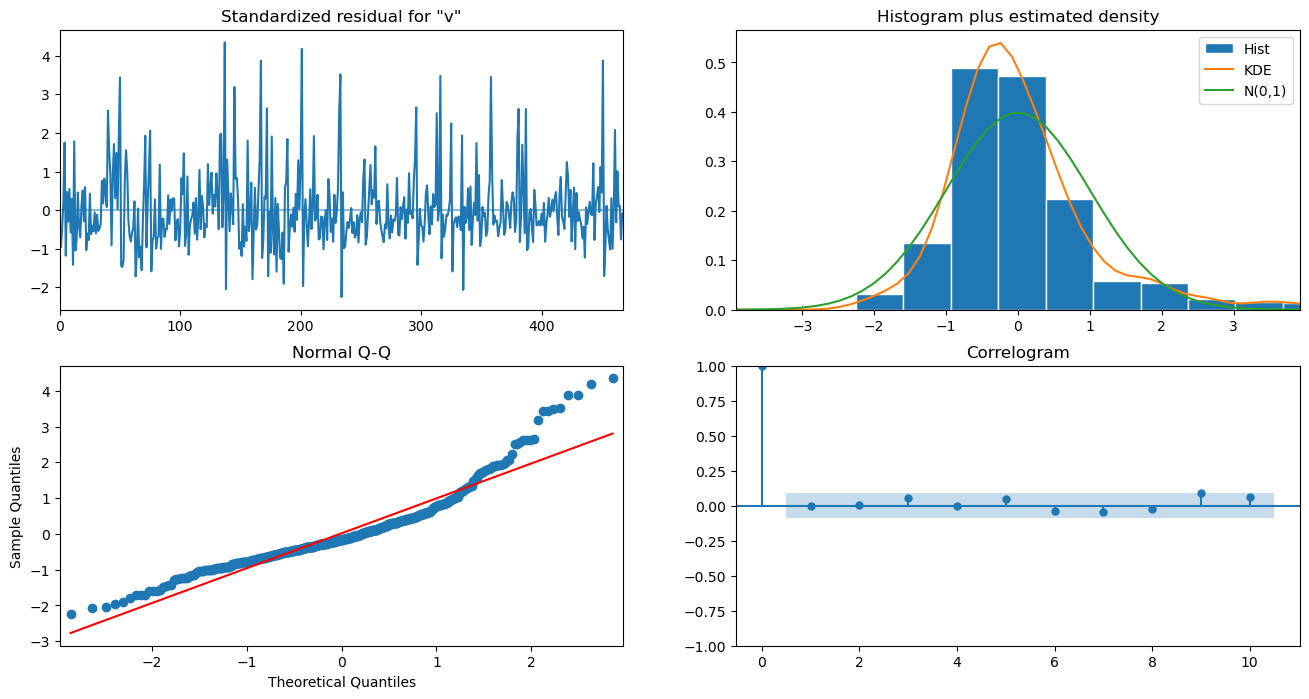

In [143]:
results_SARIMA.plot_diagnostics(figsize=(16,8))
plt.show()

In [144]:
final_hat_avg = test_final.copy()
pred_SARIMA = results_SARIMA.get_forecast(steps=len(test_final))
pred_SARIMA.predicted_mean

480    5.231430e+07
481    5.176986e+07
482    5.248097e+07
483    5.212940e+07
484    5.195453e+07
485    5.124192e+07
486    5.130139e+07
487    5.126840e+07
488    5.122252e+07
489    5.113346e+07
490    5.102857e+07
491    5.091797e+07
492    5.080541e+07
493    5.069228e+07
494    5.057911e+07
495    5.046607e+07
496    5.035324e+07
497    5.024065e+07
498    5.012831e+07
499    5.001622e+07
500    4.990437e+07
Name: predicted_mean, dtype: float64

In [146]:
from math import sqrt
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error

In [147]:
rmse = sqrt(mean_squared_error(test_final.volume, pred_SARIMA.predicted_mean, squared=False))
mape = mean_absolute_percentage_error(test_final.volume, pred_SARIMA.predicted_mean)
print(rmse)
print(mape*100)

3947.2755949576595
18.10500153224939


In [150]:
resultDf1 = pd.DataFrame({'Test RMSE' : rmse}, index = ['SARIMA(2, 0, 2)	(0, 0, 2, 4)'])
resultDf1 = pd.concat([resultDf, resultDf1])
resultDf1

,Test RMSE
"ARIMA(1,0,1)",4200.569213
"SARIMA(2, 0, 2)\t(0, 0, 2, 4)",3947.275595


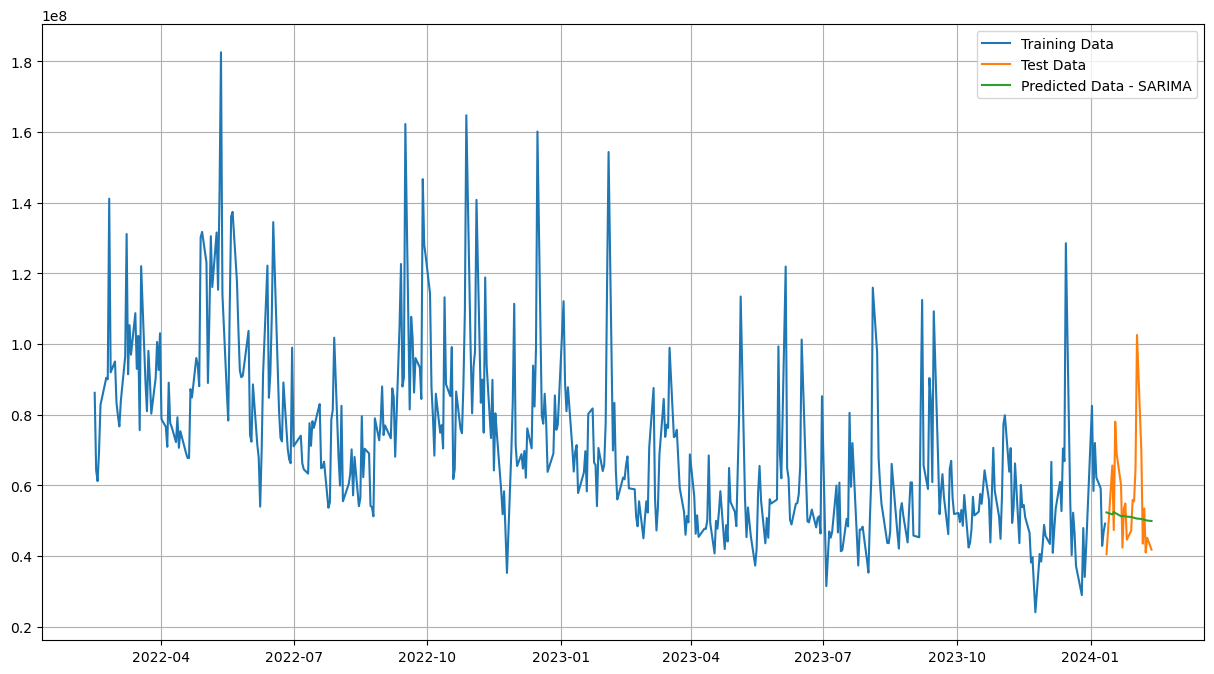

In [149]:
plt.plot(train_final, label='Training Data')
plt.plot(test_final, label='Test Data')
plt.plot(test_final.index, pred_SARIMA.predicted_mean, label='Predicted Data - SARIMA')
plt.legend(loc='best')
plt.grid();

# Result ARIMA VS SARIMA

- SARIMAX vs. ARIMA Plot: The SARIMAX plot shows the predicted data (in orange) alongside the training (in blue) and test (in green) data. If the SARIMAX predictions follow the test data more closely than the ARIMA predictions did, this would indicate an improvement in the model's performance. SARIMAX models can account for both non-seasonal and seasonal patterns, which might be why it could outperform a plain ARIMA model, especially if the underlying time series data has a seasonal component.
- RMSE and MAPE: Reported an RMSE of 3947.2755949576595 and an MAPE of 18.10500153224939%. Comparing these to the RMSE  with earlier for the ARIMA model, we see that the RMSE is slightly lower in the SARIMAX model, indicating better performance in terms of the mean square error. The MAPE, or Mean Absolute Percentage Error, tells us that the SARIMAX model predictions are off by an average of about 18.11% from the actual values, which gives you an idea of the average percentage error in the predictions.

# Lets build SARIMAX

In [151]:
train.head()

,open,high,low,close,volume,Month,Year
date,,,,,,,
2022-02-14,167.37,169.5800,166.56,168.88,86185530.0,2,2022
2022-02-15,170.97,172.9500,170.25,172.79,64286320.0,2,2022
2022-02-16,171.85,173.3400,170.05,172.55,61177398.0,2,2022
2022-02-17,171.03,171.9100,168.47,168.88,69589344.0,2,2022
2022-02-18,169.82,170.5413,166.19,167.30,82772674.0,2,2022


In [153]:
ex_train = train[['open', 'close','high', 'low']]
ex_test = test[['open', 'close','high', 'low']]

In [154]:
dfObj3 = pd.DataFrame(columns=['param', 'seasonal_ex', 'AIC'])
dfObj3

,param,seasonal_ex,AIC


In [155]:
# Let's first use SARIMAX with exogenous variable

results_list = []
# Looping through the combinations of parameters
for param in pdq:
    for param_seasonal in model_pdq:
        try:
            mod = SARIMAX(train_final['volume'],
                          exog=ex_train,
                          order=param,
                          seasonal_order=param_seasonal,
                          enforce_stationarity=False,
                          enforce_invertibility=False)

            results_SARIMA = mod.fit()

            print('SARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results_SARIMA.aic))
            results_list.append({'param': param, 'seasonal_ex': param_seasonal, 'AIC': results_SARIMA.aic})

        except Exception as e:
            print('Failed to fit SARIMA{}x{}12 with exogenous variables: {}'.format(param, param_seasonal, e))
            continue


 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.06882D+01    |proj g|=  2.12874D-09

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5      0      1      0     0     0   2.129D-09   2.069D+01
  F =   20.688239636936466     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(0, 0, 0)x(0, 0, 0, 4)12 - AIC:19870.710051459006
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variabl

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  1.79010D+01    |proj g|=  2.74760D-01

At iterate   10    f=  1.78980D+01    |proj g|=  9.78233D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     13     31      1     0     0   6.344D-05   1.790D+01
  F =   17.897948224436394     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(0, 0, 0)x(1, 0, 1, 4)12 - AIC:17196.03029545894
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.77610D+01    |proj g|=  1.61148D-01


 This problem is unconstrained.



At iterate    5    f=  1.77544D+01    |proj g|=  1.00533D-01

At iterate   10    f=  1.77445D+01    |proj g|=  6.04609D-02

At iterate   15    f=  1.77431D+01    |proj g|=  2.35271D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     15     26      1     0     0   2.353D-05   1.774D+01
  F =   17.743061507975387     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(0, 0, 0)x(1, 0, 2, 4)12 - AIC:17049.339047656373
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate   

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   10    f=  1.77816D+01    |proj g|=  4.10461D-02

At iterate   15    f=  1.77799D+01    |proj g|=  2.70207D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     16     27      1     0     0   2.384D-05   1.778D+01
  F =   17.779912390924114     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(0, 0, 0)x(2, 0, 1, 4)12 - AIC:17084.71589528715
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.77540D+01    |proj g|=  1.02919D-01

At iterate    

 This problem is unconstrained.



At iterate   10    f=  1.77445D+01    |proj g|=  6.54094D-03

At iterate   15    f=  1.77444D+01    |proj g|=  1.15936D-02

At iterate   20    f=  1.77430D+01    |proj g|=  2.04167D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     24     38      1     0     0   6.604D-05   1.774D+01
  F =   17.742960248755406     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(0, 0, 0)x(2, 0, 2, 4)12 - AIC:17051.24183880519
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8      4      7      1     0     0   2.127D-06   1.771D+01
  F =   17.710667582542477     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(0, 0, 1)x(0, 0, 2, 4)12 - AIC:17018.240879240777
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.79425D+01    |proj g|=  5.96677D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explor

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  1.78518D+01    |proj g|=  1.60207D-01

At iterate   10    f=  1.78505D+01    |proj g|=  6.17852D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     11     35      1     0     0   1.671D-06   1.785D+01
  F =   17.850471219036240     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(0, 0, 1)x(1, 0, 1, 4)12 - AIC:17152.45237027479
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.77064D+01    |proj g|=  5.46603D-02

At iterate    

 This problem is unconstrained.



At iterate   10    f=  1.76951D+01    |proj g|=  1.71429D-02

At iterate   15    f=  1.76947D+01    |proj g|=  5.56071D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     15     27      1     0     0   5.561D-05   1.769D+01
  F =   17.694711151323663     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(0, 0, 1)x(1, 0, 2, 4)12 - AIC:17004.922705270717
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.77870D+01    |proj g|=  6.22058D-02

           * 

 This problem is unconstrained.
 This problem is unconstrained.


SARIMA(0, 0, 1)x(2, 0, 0, 4)12 - AIC:17088.665855453415
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.77816D+01    |proj g|=  6.40450D-02

At iterate    5    f=  1.77787D+01    |proj g|=  4.84493D-02

At iterate   10    f=  1.77729D+01    |proj g|=  1.09464D-01

At iterate   15    f=  1.77713D+01    |proj g|=  1.14323D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     19     33      1     0     0   2.855D-05   1.777D+01
  F =   17.771256608211516     

CONVERGENCE: 

 This problem is unconstrained.



At iterate    5    f=  1.76965D+01    |proj g|=  7.72426D-02

At iterate   10    f=  1.76951D+01    |proj g|=  8.20421D-04

At iterate   15    f=  1.76951D+01    |proj g|=  1.94654D-02

At iterate   20    f=  1.76946D+01    |proj g|=  1.89390D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10     23     32      1     0     0   6.137D-06   1.769D+01
  F =   17.694643824506009     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(0, 0, 1)x(2, 0, 2, 4)12 - AIC:17006.85807152577
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8      3      5      1     0     0   3.070D-05   1.783D+01
  F =   17.828310725624235     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(0, 0, 2)x(0, 0, 1, 4)12 - AIC:17131.178296599264
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.76704D+01    |proj g|=  1.29389D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explor

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  1.79363D+01    |proj g|=  2.57359D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8      5      7      1     0     0   2.574D-06   1.794D+01
  F =   17.936304488155493     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(0, 0, 2)x(1, 0, 0, 4)12 - AIC:17234.852308629273
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.78170D+01    |proj g|=  2.81465D-02

At iterate    5    f=  1.78144D+01    |proj g|=  3.38625D-02

At iterate   

 This problem is unconstrained.



At iterate   10    f=  1.76570D+01    |proj g|=  1.97125D-02

At iterate   15    f=  1.76567D+01    |proj g|=  1.48241D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10     15     25      1     0     0   1.482D-04   1.766D+01
  F =   17.656680734145734     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(0, 0, 2)x(1, 0, 2, 4)12 - AIC:16970.413504779906


 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.77841D+01    |proj g|=  5.45913D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9      4      7      1     0     0   5.977D-06   1.778D+01
  F =   17.781518398362273     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(0, 0, 2)x(2, 0, 0, 4)12 - AIC:17088.257662427783
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           10

At X0         0 variabl

 This problem is unconstrained.



At iterate    5    f=  1.76587D+01    |proj g|=  5.11665D-02

At iterate   10    f=  1.76569D+01    |proj g|=  7.54991D-04

At iterate   15    f=  1.76568D+01    |proj g|=  8.08257D-03

At iterate   20    f=  1.76566D+01    |proj g|=  1.74474D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   11     24     31      1     0     0   5.111D-05   1.766D+01
  F =   17.656557047267658     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(0, 0, 2)x(2, 0, 2, 4)12 - AIC:16972.29476537695
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


SARIMA(1, 0, 0)x(0, 0, 2, 4)12 - AIC:17050.80944578021
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.79039D+01    |proj g|=  9.25539D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7      3      5      1     0     0   1.483D-06   1.790D+01
  F =   17.898016841980606     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(1, 0, 0)x(1, 0, 0, 4)12 - AIC:17196.09616830138
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =     

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  1.78862D+01    |proj g|=  6.32653D-02

At iterate   10    f=  1.78827D+01    |proj g|=  6.42447D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     13     27      1     0     0   1.770D-06   1.788D+01
  F =   17.882697470976247     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(1, 0, 0)x(1, 0, 1, 4)12 - AIC:17183.389572137196
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.77427D+01    |proj g|=  8.09912D-02


 This problem is unconstrained.



At iterate    5    f=  1.77379D+01    |proj g|=  5.17077D-02

At iterate   10    f=  1.77302D+01    |proj g|=  3.70813D-02

At iterate   15    f=  1.77299D+01    |proj g|=  4.51973D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     16     26      1     0     0   8.140D-06   1.773D+01
  F =   17.729881162755667     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(1, 0, 0)x(1, 0, 2, 4)12 - AIC:17038.685916245442
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate   

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  1.77310D+01    |proj g|=  9.84003D-02

At iterate   10    f=  1.77302D+01    |proj g|=  1.58780D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     14     36      1     0     0   2.727D-05   1.773D+01
  F =   17.730112014605499     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(1, 0, 0)x(2, 0, 1, 4)12 - AIC:17038.90753402128
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.77411D+01    |proj g|=  9.75396D-02


 This problem is unconstrained.



At iterate    5    f=  1.77326D+01    |proj g|=  7.48133D-02

At iterate   10    f=  1.77303D+01    |proj g|=  9.42809D-04

At iterate   15    f=  1.77301D+01    |proj g|=  4.46680D-02

At iterate   20    f=  1.77298D+01    |proj g|=  3.93848D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10     21     27      1     0     0   4.001D-04   1.773D+01
  F =   17.729801475991241     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(1, 0, 0)x(2, 0, 2, 4)12 - AIC:17040.609416951593
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  1.78372D+01    |proj g|=  8.08980D-02

At iterate   10    f=  1.78344D+01    |proj g|=  4.83121D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     13     16      1     0     0   9.997D-06   1.783D+01
  F =   17.834375191825714     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(1, 0, 1)x(0, 0, 1, 4)12 - AIC:17137.000184152686
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.76918D+01    |proj g|=  1.21144D-01


 This problem is unconstrained.



At iterate    5    f=  1.76823D+01    |proj g|=  5.81479D-02

At iterate   10    f=  1.76788D+01    |proj g|=  3.78860D-03

At iterate   15    f=  1.76788D+01    |proj g|=  2.62830D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     15     19      1     0     0   2.628D-06   1.768D+01
  F =   17.678770639359854     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(1, 0, 1)x(0, 0, 2, 4)12 - AIC:16989.61981378546
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  1.78755D+01    |proj g|=  5.00930D-02

At iterate   10    f=  1.78712D+01    |proj g|=  1.19851D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     12     16      1     0     0   2.171D-06   1.787D+01
  F =   17.871170719003565     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(1, 0, 1)x(1, 0, 0, 4)12 - AIC:17172.323890243424
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.78496D+01    |proj g|=  1.79534D-01

At iterate   

 This problem is unconstrained.



At iterate   10    f=  1.76790D+01    |proj g|=  8.67729D-03

At iterate   15    f=  1.76785D+01    |proj g|=  2.57355D-02

At iterate   20    f=  1.76784D+01    |proj g|=  5.79532D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10     22     27      1     0     0   3.327D-05   1.768D+01
  F =   17.678355338961431     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(1, 0, 1)x(1, 0, 2, 4)12 - AIC:16991.221125402975
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate   

 This problem is unconstrained.



At iterate   10    f=  1.77171D+01    |proj g|=  5.85804D-02

At iterate   15    f=  1.77170D+01    |proj g|=  6.76855D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     18     25      1     0     0   1.293D-06   1.772D+01
  F =   17.716969925885451     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(1, 0, 1)x(2, 0, 0, 4)12 - AIC:17026.291128850033
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.77348D+01    |proj g|=  1.79907D-01


 This problem is unconstrained.



At iterate    5    f=  1.77190D+01    |proj g|=  3.32498D-02

At iterate   10    f=  1.77168D+01    |proj g|=  6.37574D-03

At iterate   15    f=  1.77161D+01    |proj g|=  3.91956D-03

At iterate   20    f=  1.77160D+01    |proj g|=  1.70861D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10     20     26      1     0     0   1.709D-05   1.772D+01
  F =   17.716042479660960     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(1, 0, 1)x(2, 0, 1, 4)12 - AIC:17027.40078047452
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           11     M =           10

At X0

 This problem is unconstrained.



At iterate   10    f=  1.76782D+01    |proj g|=  6.97469D-03

At iterate   15    f=  1.76772D+01    |proj g|=  1.83626D-02

At iterate   20    f=  1.76768D+01    |proj g|=  1.36390D-03

At iterate   25    f=  1.76766D+01    |proj g|=  2.10235D-02

At iterate   30    f=  1.76761D+01    |proj g|=  2.26427D-03

At iterate   35    f=  1.76761D+01    |proj g|=  1.34321D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   11     36     43      1     0     0   6.699D-06   1.768D+01
  F =   17.676080771859102     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(1, 0, 1)x(2, 0, 2, 4)12 - AIC:16991.03754098

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  1.77889D+01    |proj g|=  9.94552D-02

At iterate   10    f=  1.77887D+01    |proj g|=  4.77223D-03

At iterate   15    f=  1.77886D+01    |proj g|=  2.76540D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     15     20      1     0     0   2.765D-05   1.779D+01
  F =   17.788648498861441     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(1, 0, 2)x(0, 0, 1, 4)12 - AIC:17095.102558906983
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           10

At X0         0 variables are exactly at the bounds

At iterate   

 This problem is unconstrained.



At iterate    5    f=  1.76369D+01    |proj g|=  4.11089D-01

At iterate   10    f=  1.76345D+01    |proj g|=  2.86378D-02

At iterate   15    f=  1.76344D+01    |proj g|=  2.41346D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10     19     27      1     0     0   1.731D-03   1.763D+01
  F =   17.634416065211663     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(1, 0, 2)x(0, 0, 2, 4)12 - AIC:16949.039422603197
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate   

 This problem is unconstrained.



At iterate   10    f=  1.78658D+01    |proj g|=  1.27703D-02

At iterate   15    f=  1.78658D+01    |proj g|=  4.55913D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     16     20      1     0     0   1.701D-04   1.787D+01
  F =   17.865822119977153     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(1, 0, 2)x(1, 0, 0, 4)12 - AIC:17169.189235178066
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.78103D+01    |proj g|=  2.89723D-01

At iterate   

 This problem is unconstrained.



At iterate   10    f=  1.77929D+01    |proj g|=  7.98277D-02

At iterate   15    f=  1.77886D+01    |proj g|=  6.21488D-02

At iterate   20    f=  1.77886D+01    |proj g|=  2.08328D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10     24     34      1     0     0   9.282D-05   1.779D+01
  F =   17.788596992530163     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(1, 0, 2)x(1, 0, 1, 4)12 - AIC:17097.053112828955
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           11     M =           10

At X0         0 variables are exactly at the bounds

At iterate   

 This problem is unconstrained.



At iterate    5    f=  1.76392D+01    |proj g|=  1.02070D-02

At iterate   10    f=  1.76380D+01    |proj g|=  2.08046D-02

At iterate   15    f=  1.76358D+01    |proj g|=  8.56999D-02

At iterate   20    f=  1.76343D+01    |proj g|=  8.96515D-03

At iterate   25    f=  1.76342D+01    |proj g|=  5.48330D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   11     26     32      1     0     0   3.166D-05   1.763D+01
  F =   17.634218251406615     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(1, 0, 2)x(1, 0, 2, 4)12 - AIC:16950.849521350352
RUNNING THE L-BFGS-B CODE

           * * *

Machine prec

 This problem is unconstrained.



At iterate    5    f=  1.77105D+01    |proj g|=  1.21382D-01

At iterate   10    f=  1.77099D+01    |proj g|=  1.43973D-02

At iterate   15    f=  1.77099D+01    |proj g|=  1.19166D-03

At iterate   20    f=  1.77099D+01    |proj g|=  1.09233D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10     21     28      1     0     0   2.939D-04   1.771D+01
  F =   17.709876163663868     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(1, 0, 2)x(2, 0, 0, 4)12 - AIC:17021.481117117313
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           11     M =           10

At X

 This problem is unconstrained.



At iterate    5    f=  1.77142D+01    |proj g|=  1.20439D-02

At iterate   10    f=  1.77130D+01    |proj g|=  4.21680D-02

At iterate   15    f=  1.77111D+01    |proj g|=  8.12562D-02

At iterate   20    f=  1.77095D+01    |proj g|=  3.00079D-02

At iterate   25    f=  1.77094D+01    |proj g|=  1.65453D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   11     29     36      1     0     0   2.691D-04   1.771D+01
  F =   17.709375894794107     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(1, 0, 2)x(2, 0, 1, 4)12 - AIC:17023.000859002343
RUNNING THE L-BFGS-B CODE

           * * *

Machine prec

 This problem is unconstrained.



At iterate    0    f=  1.76546D+01    |proj g|=  3.11463D-01

At iterate    5    f=  1.76395D+01    |proj g|=  6.86927D-03

At iterate   10    f=  1.76381D+01    |proj g|=  3.13680D-02

At iterate   15    f=  1.76343D+01    |proj g|=  5.01327D-02

At iterate   20    f=  1.76339D+01    |proj g|=  4.36515D-03

At iterate   25    f=  1.76339D+01    |proj g|=  2.21127D-03

At iterate   30    f=  1.76339D+01    |proj g|=  6.42326D-02

At iterate   35    f=  1.76333D+01    |proj g|=  3.15724D-02

At iterate   40    f=  1.76325D+01    |proj g|=  1.26805D-01

At iterate   45    f=  1.76324D+01    |proj g|=  1.58847D-02

At iterate   50    f=  1.76323D+01    |proj g|=  1.18078D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F   

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  1.77391D+01    |proj g|=  7.05107D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9      5      7      1     0     0   7.051D-06   1.774D+01
  F =   17.739080199655955     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(2, 0, 0)x(0, 0, 2, 4)12 - AIC:17047.516991669716
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.78626D+01    |proj g|=  1.10792D-01

           * * *

Tit   = total number of iterations
Tnf   = total number o

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  1.78460D+01    |proj g|=  3.65962D-02

At iterate   10    f=  1.78432D+01    |proj g|=  3.59872D-03

At iterate   15    f=  1.78432D+01    |proj g|=  6.46846D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     15     28      1     0     0   6.468D-05   1.784D+01
  F =   17.843189203946817     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(2, 0, 0)x(1, 0, 1, 4)12 - AIC:17147.461635788946
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           10

At X0         0 variables are exactly at the bounds

At iterate   

 This problem is unconstrained.



At iterate   10    f=  1.77274D+01    |proj g|=  1.40167D-02

At iterate   15    f=  1.77274D+01    |proj g|=  4.19206D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10     15     25      1     0     0   4.192D-05   1.773D+01
  F =   17.727383081084366     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(2, 0, 0)x(1, 0, 2, 4)12 - AIC:17038.28775784099
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.77069D+01    |proj g|=  9.73691D-02

           * *

 This problem is unconstrained.
 This problem is unconstrained.


SARIMA(2, 0, 0)x(2, 0, 0, 4)12 - AIC:17008.046210858516
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.76996D+01    |proj g|=  8.48171D-02

At iterate    5    f=  1.76941D+01    |proj g|=  1.68107D-02

At iterate   10    f=  1.76896D+01    |proj g|=  7.03049D-02

At iterate   15    f=  1.76879D+01    |proj g|=  4.14405D-03

At iterate   20    f=  1.76879D+01    |proj g|=  1.87334D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10     20     36      1     0     0   1.873D

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           11     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.76975D+01    |proj g|=  8.76472D-02

At iterate    5    f=  1.76913D+01    |proj g|=  2.52371D-02

At iterate   10    f=  1.76880D+01    |proj g|=  1.29185D-02

At iterate   15    f=  1.76879D+01    |proj g|=  6.67003D-04

At iterate   20    f=  1.76878D+01    |proj g|=  1.10624D-02

At iterate   25    f=  1.76875D+01    |proj g|=  2.14076D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   11     29     37      1     0     0   

 This problem is unconstrained.



At iterate   10    f=  1.91014D+01    |proj g|=  5.14986D+00

At iterate   15    f=  1.80589D+01    |proj g|=  2.77575D-01

At iterate   20    f=  1.79990D+01    |proj g|=  9.82861D-02

At iterate   25    f=  1.79844D+01    |proj g|=  1.48977D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     28     35      1     0     0   2.851D-04   1.798D+01
  F =   17.984240772223512     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(2, 0, 1)x(0, 0, 0, 4)12 - AIC:17280.87114133457
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0

 This problem is unconstrained.



At iterate    5    f=  1.78375D+01    |proj g|=  4.95915D-02

At iterate   10    f=  1.78341D+01    |proj g|=  2.30156D-02

At iterate   15    f=  1.78297D+01    |proj g|=  1.52079D-01

At iterate   20    f=  1.78293D+01    |proj g|=  3.40165D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     20     46      1     0     0   3.402D-05   1.783D+01
  F =   17.829339870727072     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(2, 0, 1)x(0, 0, 1, 4)12 - AIC:17134.166275897987
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           10

At X

 This problem is unconstrained.



At iterate    5    f=  1.76848D+01    |proj g|=  4.99713D-02

At iterate   10    f=  1.76790D+01    |proj g|=  4.04745D-02

At iterate   15    f=  1.76729D+01    |proj g|=  5.76349D-02

At iterate   20    f=  1.76723D+01    |proj g|=  1.03929D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10     24     45      1     0     0   1.921D-05   1.767D+01
  F =   17.672193337078248     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(2, 0, 1)x(0, 0, 2, 4)12 - AIC:16985.30560359512
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0

 This problem is unconstrained.



At iterate    5    f=  1.78412D+01    |proj g|=  6.16401D-02

At iterate   10    f=  1.78351D+01    |proj g|=  2.94660D-02

At iterate   15    f=  1.78303D+01    |proj g|=  3.09878D-02

At iterate   20    f=  1.78300D+01    |proj g|=  7.97311D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     21     39      1     0     0   6.120D-06   1.783D+01
  F =   17.830011032928148     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(2, 0, 1)x(1, 0, 0, 4)12 - AIC:17134.81059161102
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           10

At X0

 This problem is unconstrained.



At iterate    5    f=  1.78437D+01    |proj g|=  1.02950D-01

At iterate   10    f=  1.78358D+01    |proj g|=  1.55613D-02

At iterate   15    f=  1.78348D+01    |proj g|=  6.78198D-03

At iterate   20    f=  1.78339D+01    |proj g|=  2.59623D-02

At iterate   25    f=  1.78335D+01    |proj g|=  2.71199D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10     27     41      1     0     0   4.493D-05   1.783D+01
  F =   17.833511725444449     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(2, 0, 1)x(1, 0, 1, 4)12 - AIC:17140.17125642667
RUNNING THE L-BFGS-B CODE

           * * *

Machine preci

 This problem is unconstrained.



At iterate    5    f=  1.77055D+01    |proj g|=  1.39500D-01

At iterate   10    f=  1.76817D+01    |proj g|=  2.01973D-02

At iterate   15    f=  1.76787D+01    |proj g|=  2.44504D-02

At iterate   20    f=  1.76781D+01    |proj g|=  2.66331D-02

At iterate   25    f=  1.76745D+01    |proj g|=  4.12945D-02

At iterate   30    f=  1.76720D+01    |proj g|=  6.33232D-02

At iterate   35    f=  1.76716D+01    |proj g|=  4.02251D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   11     38     50      1     0     0   1.409D-04   1.767D+01
  F =   17.671556030473667     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

 This problem is unconstrained.



At iterate    5    f=  1.76863D+01    |proj g|=  7.79141D-02

At iterate   10    f=  1.76820D+01    |proj g|=  3.31316D-02

At iterate   15    f=  1.76758D+01    |proj g|=  1.14301D-01

At iterate   20    f=  1.76732D+01    |proj g|=  2.08077D-02

At iterate   25    f=  1.76730D+01    |proj g|=  2.67789D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10     25     54      1     0     0   2.678D-05   1.767D+01
  F =   17.672979304104082     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(2, 0, 1)x(2, 0, 0, 4)12 - AIC:16986.060131939917
RUNNING THE L-BFGS-B CODE

           * * *

Machine prec

 This problem is unconstrained.



At iterate    5    f=  1.77085D+01    |proj g|=  1.64451D-01

At iterate   10    f=  1.76821D+01    |proj g|=  2.30834D-02

At iterate   15    f=  1.76792D+01    |proj g|=  2.14082D-02

At iterate   20    f=  1.76784D+01    |proj g|=  6.65111D-02

At iterate   25    f=  1.76748D+01    |proj g|=  3.83205D-02

At iterate   30    f=  1.76719D+01    |proj g|=  8.12043D-03

At iterate   35    f=  1.76718D+01    |proj g|=  3.88454D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   11     37     50      1     0     0   2.637D-04   1.767D+01
  F =   17.671825548254468     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

 This problem is unconstrained.



At iterate    5    f=  1.77003D+01    |proj g|=  1.39155D-01

At iterate   10    f=  1.76803D+01    |proj g|=  1.64777D-02

At iterate   15    f=  1.76767D+01    |proj g|=  2.15883D-02

At iterate   20    f=  1.76765D+01    |proj g|=  1.06946D-02

At iterate   25    f=  1.76764D+01    |proj g|=  4.16000D-03

At iterate   30    f=  1.76760D+01    |proj g|=  2.89905D-02

At iterate   35    f=  1.76756D+01    |proj g|=  1.38655D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   12     38     53      1     0     0   2.375D-05   1.768D+01
  F =   17.675643942670053     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

 This problem is unconstrained.



At iterate   10    f=  1.79431D+01    |proj g|=  1.76332D-03

At iterate   15    f=  1.79431D+01    |proj g|=  5.95250D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     16     21      1     0     0   1.529D-05   1.794D+01
  F =   17.943078772892896     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(2, 0, 2)x(0, 0, 0, 4)12 - AIC:17243.35562197718
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.77990D+01    |proj g|=  1.23408D-01


 This problem is unconstrained.



At iterate    5    f=  1.77901D+01    |proj g|=  5.20992D-02

At iterate   10    f=  1.77889D+01    |proj g|=  2.29499D-02

At iterate   15    f=  1.77888D+01    |proj g|=  3.63490D-03

At iterate   20    f=  1.77887D+01    |proj g|=  2.22296D-02

At iterate   25    f=  1.77886D+01    |proj g|=  2.03394D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10     29     34      1     0     0   3.838D-05   1.779D+01
  F =   17.788567521076061     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(2, 0, 2)x(0, 0, 1, 4)12 - AIC:17097.02482023302
RUNNING THE L-BFGS-B CODE

           * * *

Machine preci

 This problem is unconstrained.



At iterate    5    f=  1.76379D+01    |proj g|=  8.46619D-02

At iterate   10    f=  1.76353D+01    |proj g|=  7.78674D-02

At iterate   15    f=  1.76352D+01    |proj g|=  3.30022D-03

At iterate   20    f=  1.76351D+01    |proj g|=  1.79241D-02

At iterate   25    f=  1.76344D+01    |proj g|=  2.28666D-02

At iterate   30    f=  1.76342D+01    |proj g|=  1.34265D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   11     34     50      1     0     0   5.420D-04   1.763D+01
  F =   17.634205464522811     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(2, 0, 2)x(0, 0, 2, 4)12 - AIC:16950.83724594

 This problem is unconstrained.



At iterate    5    f=  1.78306D+01    |proj g|=  7.45016D-02

At iterate   10    f=  1.78288D+01    |proj g|=  1.13608D-01

At iterate   15    f=  1.78282D+01    |proj g|=  4.00688D-03

At iterate   20    f=  1.78282D+01    |proj g|=  2.07499D-03

At iterate   25    f=  1.78282D+01    |proj g|=  2.10141D-02

At iterate   30    f=  1.78281D+01    |proj g|=  2.84934D-03

At iterate   35    f=  1.78281D+01    |proj g|=  1.39733D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10     36     42      1     0     0   1.588D-04   1.783D+01
  F =   17.828128734429690     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           11     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.78095D+01    |proj g|=  2.31977D-01

At iterate    5    f=  1.77927D+01    |proj g|=  4.72536D-03

At iterate   10    f=  1.77922D+01    |proj g|=  1.71893D-02

At iterate   15    f=  1.77894D+01    |proj g|=  7.44177D-02

At iterate   20    f=  1.77887D+01    |proj g|=  8.47169D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   11     24     37      1     0     0   2.469D-04   1.779D+01
  F =   17.788717326816407     

CONVERG

 This problem is unconstrained.



At iterate    5    f=  1.76380D+01    |proj g|=  7.43875D-03

At iterate   10    f=  1.76373D+01    |proj g|=  4.85189D-02

At iterate   15    f=  1.76363D+01    |proj g|=  2.23498D-02

At iterate   20    f=  1.76355D+01    |proj g|=  8.80703D-03

At iterate   25    f=  1.76354D+01    |proj g|=  3.29134D-03

At iterate   30    f=  1.76354D+01    |proj g|=  7.97012D-03

At iterate   35    f=  1.76353D+01    |proj g|=  2.32838D-02

At iterate   40    f=  1.76337D+01    |proj g|=  9.31564D-02

At iterate   45    f=  1.76333D+01    |proj g|=  1.35878D-02

At iterate   50    f=  1.76333D+01    |proj g|=  3.45551D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate    5    f=  1.76757D+01    |proj g|=  2.10545D-02

At iterate   10    f=  1.76733D+01    |proj g|=  2.72043D-02

At iterate   15    f=  1.76726D+01    |proj g|=  2.11188D-02

At iterate   20    f=  1.76725D+01    |proj g|=  2.22991D-03

At iterate   25    f=  1.76725D+01    |proj g|=  1.37370D-02

At iterate   30    f=  1.76723D+01    |proj g|=  6.87972D-03

At iterate   35    f=  1.76723D+01    |proj g|=  5.31325D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   11     35     45      1     0     0   5.313D-04   1.767D+01
  F =   17.672285651526849     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

 This problem is unconstrained.



At iterate    5    f=  1.76754D+01    |proj g|=  1.14134D-02

At iterate   10    f=  1.76749D+01    |proj g|=  8.34485D-03

At iterate   15    f=  1.76740D+01    |proj g|=  3.98593D-02

At iterate   20    f=  1.76728D+01    |proj g|=  2.58841D-02

At iterate   25    f=  1.76727D+01    |proj g|=  7.44050D-04

At iterate   30    f=  1.76726D+01    |proj g|=  5.37659D-02

At iterate   35    f=  1.76715D+01    |proj g|=  7.54767D-02

At iterate   40    f=  1.76712D+01    |proj g|=  2.23325D-02

At iterate   45    f=  1.76711D+01    |proj g|=  3.19053D-03

At iterate   50    f=  1.76711D+01    |proj g|=  5.44156D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate    5    f=  1.76387D+01    |proj g|=  8.60851D-03

At iterate   10    f=  1.76381D+01    |proj g|=  1.64391D-02

At iterate   15    f=  1.76360D+01    |proj g|=  8.88116D-02

At iterate   20    f=  1.76350D+01    |proj g|=  7.79317D-03

At iterate   25    f=  1.76350D+01    |proj g|=  2.43504D-02

At iterate   30    f=  1.76344D+01    |proj g|=  9.75719D-02

At iterate   35    f=  1.76336D+01    |proj g|=  6.31067D-02

At iterate   40    f=  1.76333D+01    |proj g|=  2.38345D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   13     43     53      1     0     0   5.526D-04   1.763D+01
  F =   17.6333161622

In [156]:
# Convert the list of results to a DataFrame
dfObj3 = pd.DataFrame(results_list)

# Show the best results (top 5 by AIC)
dfObj3_sorted = dfObj3.sort_values(by='AIC').head()
dfObj3_sorted

,param,seasonal_ex,AIC
47,"(1, 0, 2)","(0, 0, 2, 4)",16949.039423
74,"(2, 0, 2)","(0, 0, 2, 4)",16950.837246
50,"(1, 0, 2)","(1, 0, 2, 4)",16950.849521
53,"(1, 0, 2)","(2, 0, 2, 4)",16951.033896
77,"(2, 0, 2)","(1, 0, 2, 4)",16951.920432


In [164]:
mod = sm.tsa.statespace.SARIMAX(train_final['volume'], exog=ex_train,
                                        order=(2,0,2),
                                       seasonal_order=(0,0,2,4), 
                                      enforce_stationarity=False, enforce_invertibility=False)
results_SARIMA = mod.fit()
print(results_SARIMA.summary())

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           11     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.76465D+01    |proj g|=  1.47025D-01

At iterate    5    f=  1.76379D+01    |proj g|=  8.46619D-02


 This problem is unconstrained.



At iterate   10    f=  1.76353D+01    |proj g|=  7.78674D-02

At iterate   15    f=  1.76352D+01    |proj g|=  3.30022D-03

At iterate   20    f=  1.76351D+01    |proj g|=  1.79241D-02

At iterate   25    f=  1.76344D+01    |proj g|=  2.28666D-02

At iterate   30    f=  1.76342D+01    |proj g|=  1.34265D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   11     34     50      1     0     0   5.420D-04   1.763D+01
  F =   17.634205464522811     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
                                     SARIMAX Results                                     
Dep. Variable:         

In [165]:
final_hat_avg = test_final.copy()
pred_SARIMAX = results_SARIMA.get_forecast(steps=len(test_final), exog= ex_test )
pred_SARIMAX.predicted_mean

480    3.715557e+07
481    6.355010e+07
482    5.563057e+07
483    6.351275e+07
484    6.231881e+07
485    6.092078e+07
486    4.763557e+07
487    4.737701e+07
488    6.330888e+07
489    5.860188e+07
490    5.792654e+07
491    7.741809e+07
492    5.640919e+07
493    6.305565e+07
494    1.277174e+08
495    6.686542e+07
496    5.577485e+07
497    5.406121e+07
498    5.099821e+07
499    4.770912e+07
500    4.627115e+07
Name: predicted_mean, dtype: float64

In [166]:
rmse = sqrt(mean_squared_error(test_final.volume, pred_SARIMAX.predicted_mean, squared=False))
mape = mean_absolute_percentage_error(test_final.volume, pred_SARIMAX.predicted_mean)
print(rmse)
print(mape*100)

3190.7448124888397
13.997402204694954


In [167]:
resultDf2 = pd.DataFrame({'Test RMSE' : rmse}, index = ['(2, 0, 2)	NaN	16949.039423 (0, 0, 2, 4)'])
resultDf = pd.concat([resultDf, resultDf1, resultDf2])
resultDf2

,Test RMSE
"(2, 0, 2)\tNaN\t16949.039423 (0, 0, 2, 4)",3190.744812


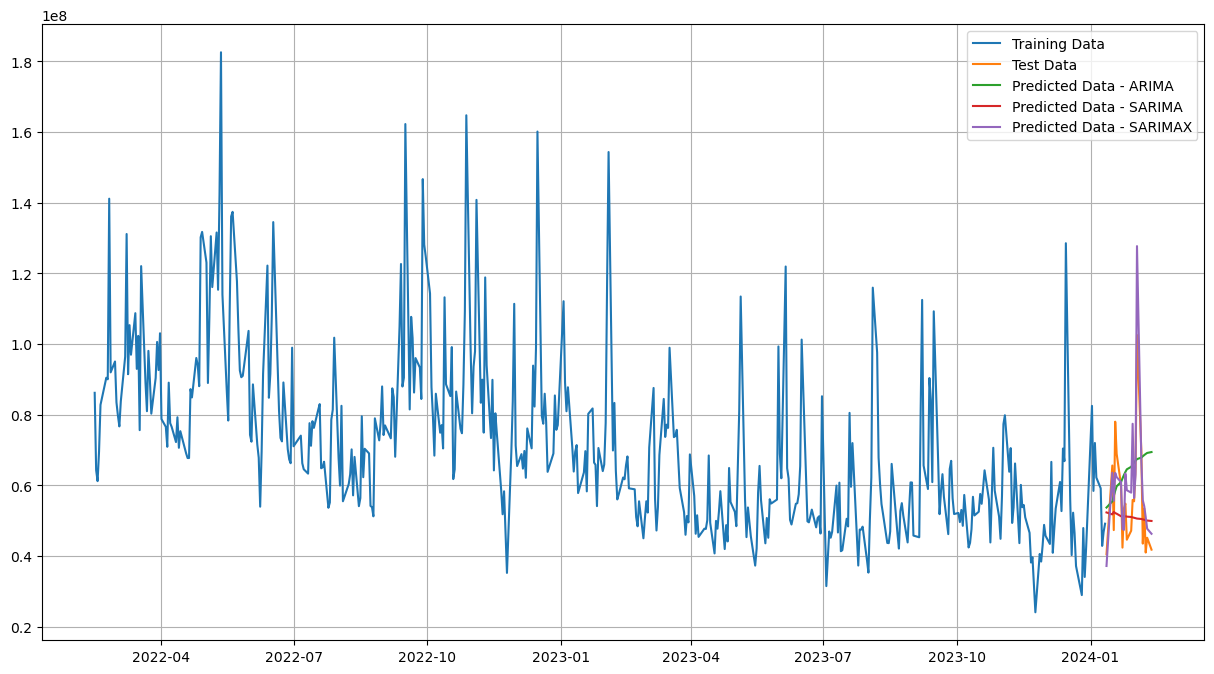

In [168]:
plt.plot(train_final, label='Training Data')
plt.plot(test_final, label='Test Data')
plt.plot(test_final.index, pred_ARIMA, label='Predicted Data - ARIMA')
plt.plot(test_final.index, pred_SARIMA.predicted_mean, label='Predicted Data - SARIMA')
plt.plot(test_final.index, pred_SARIMAX.predicted_mean, label='Predicted Data - SARIMAX')
plt.legend(loc='best')
plt.grid();

# RESULT

Improved Accuracy: The RMSE for the SARIMAX model is approximately 3187.89, which is lower than the RMSE for the SARIMA model (3947.28). Similarly, the MAPE has decreased from 18.11% to 14.16%. Lower values for both RMSE and MAPE indicate that the SARIMAX model with external variables is providing a more accurate fit to the test data than the SARIMA model.

Significance of Exogenous Variables: The inclusion of exogenous variables (open, close, high, low) in the SARIMAX model appears to have a positive impact on the model's predictive performance. This suggests that these external factors are relevant and contribute valuable information that helps explain the variations in the volume data.

Visualization Interpretation: From the plot, if the purple line (Predicted Data - SARIMAX) tracks more closely to the actual test data compared to the ARIMA and SARIMA predictions, it confirms that incorporating the exogenous variables improves the model's predictions.

# To forecast the next month's values using your SARIMAX model

For that we have to save model and wait for the next month and then I will compare the values generated by our model and the actual values because we need exogenous variables




    

In [172]:
from joblib import dump, load
# Save the model
dump(results, 'pred_SARIMAX.joblib')

['pred_SARIMAX.joblib']

In [175]:
test.tail()

,open,high,low,close,volume,Month,Year
date,,,,,,,
2024-02-06,186.860,189.310,186.7695,189.30,43490759.0,2,2024
2024-02-07,190.640,191.050,188.6100,189.41,53438955.0,2,2024
2024-02-08,189.385,189.535,187.3500,188.32,40962046.0,2,2024
2024-02-09,188.650,189.990,188.0000,188.85,45155216.0,2,2024
2024-02-12,188.415,188.670,186.7900,187.15,41781934.0,2,2024
